# Tugas Akhir Proyek Mata Kuliah Data Mining
**Nama Kelompok : MiningMU**

Anggota:
- Zeko Baharudin Firdaus - 2200018026
- Nadya Prita Ramadhani - 2200018127
- Yoga Rusydi Arifin - 2200018165
- Zainnaya Putri Diyanti - 2200018426
- Yudha Wahyu Saputra - 2200018431



Menghubungkan ke drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import library yang akan digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

### Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kelompok_datmin/dataAirQualityJakarta.csv')
df.dtypes

,0
_id,int64
periode_data,int64
tanggal,object
stasiun,object
pm_sepuluh,object
pm_duakomalima,object
sulfur_dioksida,object
karbon_monoksida,object
ozon,object
nitrogen_dioksida,object


In [ ]:
df

,_id,periode_data,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,parameter_pencemar_kritis,kategori
0,1,202302,2023-02-25T00:00:00,DKI5 Kebon Jeruk Jakarta Barat,35,-,13,12,31,18,35,PM10,BAIK
1,2,202302,2023-02-26T00:00:00,DKI5 Kebon Jeruk Jakarta Barat,23,-,14,9,32,11,32,O3,BAIK
2,3,202302,2023-02-27T00:00:00,DKI5 Kebon Jeruk Jakarta Barat,20,-,13,8,33,13,33,O3,BAIK
3,4,202302,2023-02-28T00:00:00,DKI5 Kebon Jeruk Jakarta Barat,30,-,21,11,28,18,30,PM10,BAIK
4,5,202303,2023-03-01T00:00:00,DKI1 Bunderan HI,38,44,50,8,19,27,50,3,BAIK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,1821,202311,2023-11-26T00:00:00,DKI5 Kebon Jeruk,48,71,33,21,44,20,71,PM25,SEDANG
1821,1822,202311,2023-11-27T00:00:00,DKI5 Kebon Jeruk,51,76,32,18,53,19,76,PM25,SEDANG
1822,1823,202311,2023-11-28T00:00:00,DKI5 Kebon Jeruk,56,88,33,20,48,21,88,PM25,SEDANG
1823,1824,202311,2023-11-29T00:00:00,DKI5 Kebon Jeruk,56,88,32,18,56,18,88,PM25,SEDANG


# EDA

## Informasi singkat dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   _id                        1825 non-null   int64 
 1   periode_data               1825 non-null   int64 
 2   tanggal                    1825 non-null   object
 3   stasiun                    1825 non-null   object
 4   pm_sepuluh                 1825 non-null   object
 5   pm_duakomalima             1825 non-null   object
 6   sulfur_dioksida            1825 non-null   object
 7   karbon_monoksida           1825 non-null   object
 8   ozon                       1825 non-null   object
 9   nitrogen_dioksida          1825 non-null   object
 10  max                        1825 non-null   object
 11  parameter_pencemar_kritis  1812 non-null   object
 12  kategori                   1825 non-null   object
dtypes: int64(2), object(11)
memory usage: 185.5+ KB


## Cek duplikasi

In [ ]:
df.duplicated().sum()

0

## Cek data kosong

In [ ]:
df.isna().sum()

,0
_id,0
periode_data,0
tanggal,0
stasiun,0
pm_sepuluh,0
pm_duakomalima,0
sulfur_dioksida,0
karbon_monoksida,0
ozon,0
nitrogen_dioksida,0


## Melihat value setiap kolom object

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=['number']).columns

tot_len= 0
for i in df.columns:
    if i not in numeric_columns:
        print(f'\033[31m{i.upper()}\033[0m'.center(50, ' '))
        print(df[i].value_counts())
        tot_len= tot_len+ df[i].nunique()
        print()
        print()

                 TANGGAL                 
tanggal
2023-02-25T00:00:00    5
2023-08-13T00:00:00    5
2023-08-11T00:00:00    5
2023-08-10T00:00:00    5
2023-08-09T00:00:00    5
                      ..
2023-01-31T00:00:00    5
2023-01-30T00:00:00    5
2023-01-29T00:00:00    5
2023-01-28T00:00:00    5
2023-11-30T00:00:00    5
Name: count, Length: 365, dtype: int64


                 STASIUN                 
stasiun
DKI1 Bunderan HI                  365
DKI2 Kelapa Gading                365
DKI3 Jagakarsa                    365
DKI4 Lubang Buaya                 365
DKI5 Kebon Jeruk                  214
DKI5 Kebon Jeruk Jakarta Barat    151
Name: count, dtype: int64


               PM_SEPULUH                
pm_sepuluh
-     222
59     57
56     51
51     51
52     50
     ... 
10      1
13      1
94      1
92      1
14      1
Name: count, Length: 86, dtype: int64


             PM_DUAKOMALIMA              
pm_duakomalima
-      295
75      35
87      35
83      34
86      33
      ... 
16

## Visualisasi

### kolom stasiun

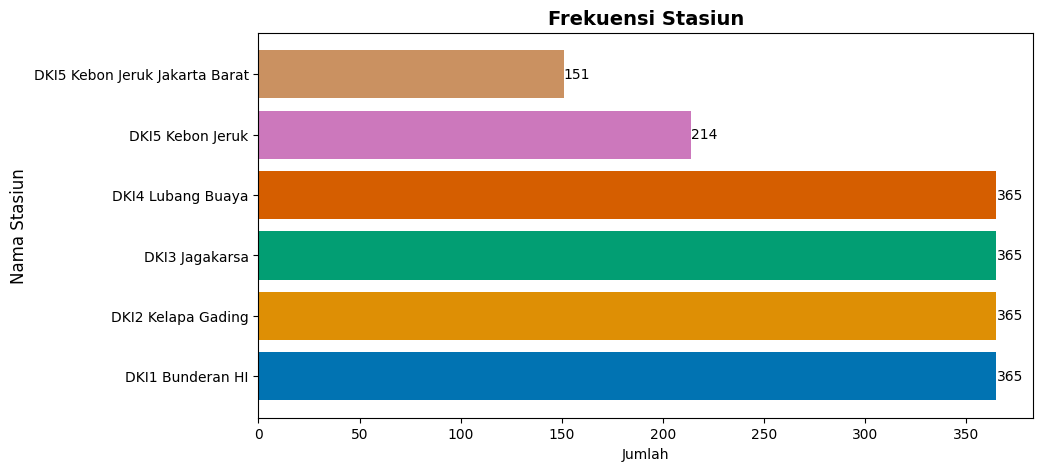

In [ ]:
cnts = df['stasiun'].value_counts()

fig, axes = plt.subplots(figsize=(10, 5))

bars = axes.barh(cnts.index, cnts.values, color=sns.color_palette('colorblind'))
axes.bar_label(bars)

axes.set_title('Frekuensi Stasiun', fontsize=14, fontweight='bold')
axes.set_ylabel('Nama Stasiun', fontsize=12)
axes.get_yaxis()
axes.set_xlabel('Jumlah')

plt.show()

### kolom kategori

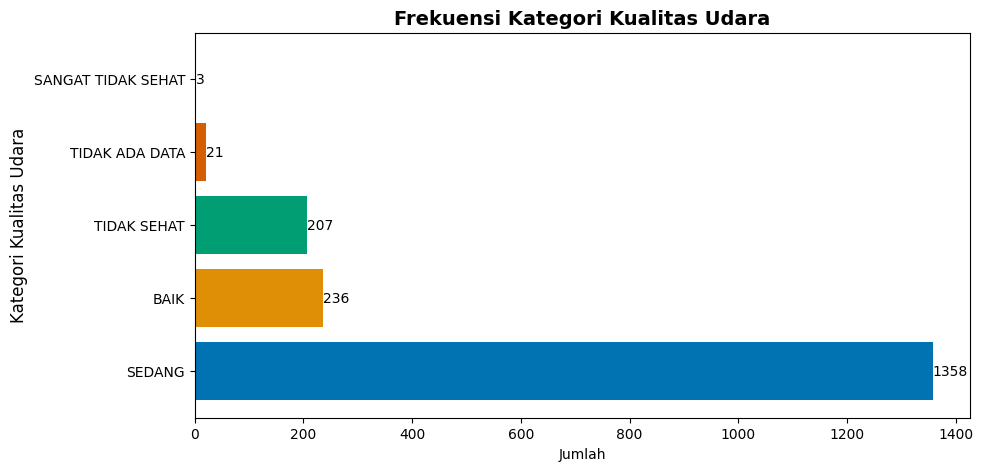

In [ ]:
cnts = df['kategori'].value_counts()

fig, axes = plt.subplots(figsize=(10, 5))

bars = axes.barh(cnts.index, cnts.values, color=sns.color_palette('colorblind'))
axes.bar_label(bars)

axes.set_title('Frekuensi Kategori Kualitas Udara', fontsize=14, fontweight='bold')
axes.set_ylabel('Kategori Kualitas Udara', fontsize=12)
axes.get_yaxis()
axes.set_xlabel('Jumlah')

plt.show()

### kolom parameter pencemar kritis

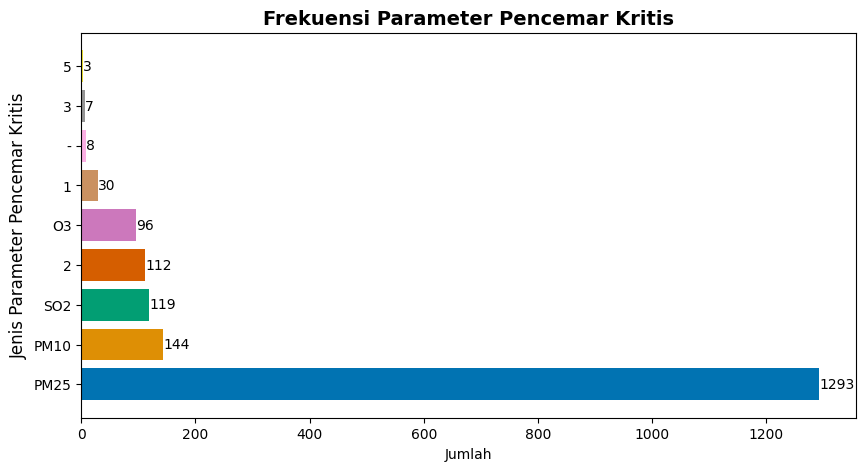

In [ ]:
cnts = df['parameter_pencemar_kritis'].value_counts()

fig, axes = plt.subplots(figsize=(10, 5))

bars = axes.barh(cnts.index, cnts.values, color=sns.color_palette('colorblind'))
axes.bar_label(bars)

axes.set_title('Frekuensi Parameter Pencemar Kritis', fontsize=14, fontweight='bold')
axes.set_ylabel('Jenis Parameter Pencemar Kritis', fontsize=12)
axes.get_yaxis()
axes.set_xlabel('Jumlah')

plt.show()

### kolom PM 10

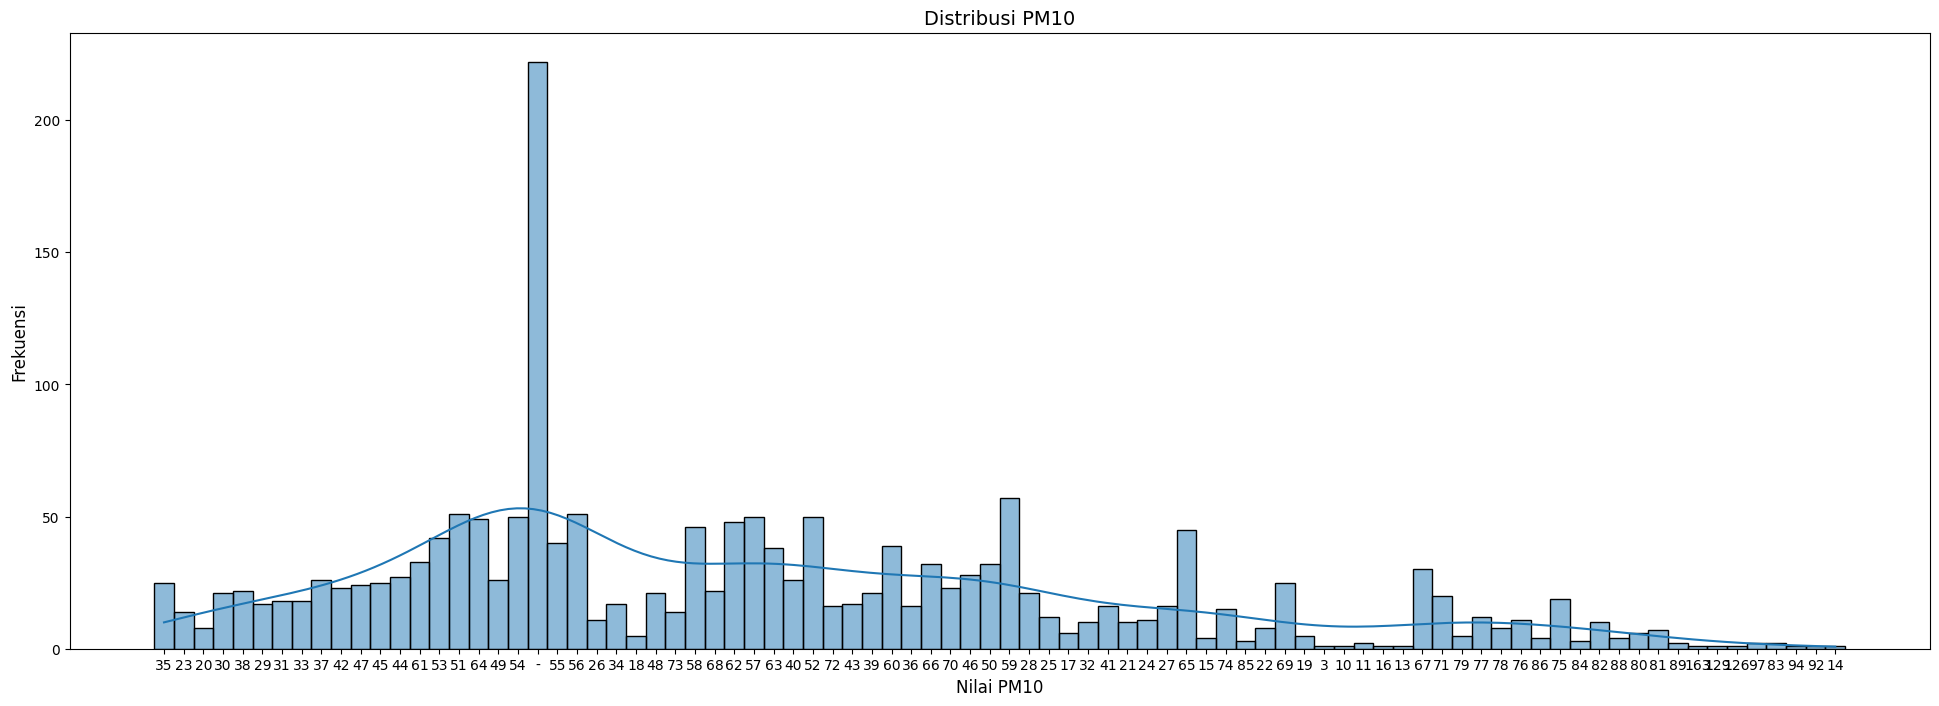

In [ ]:
plt.subplots(figsize=(24, 8))
sns.histplot(df['pm_sepuluh'], kde=True)
plt.title('Distribusi PM10', fontsize=14) # Menambahkan judul
plt.xlabel('Nilai PM10', fontsize=12) # Memberi label sumbu x
plt.ylabel('Frekuensi', fontsize=12) # Memberi label sumbu y
plt.xticks(fontsize=10) # Mengatur ukuran font nilai pada sumbu x
plt.yticks(fontsize=10) # Mengatur ukuran font nilai pada sumbu y
plt.show()

### kolom PM2.5

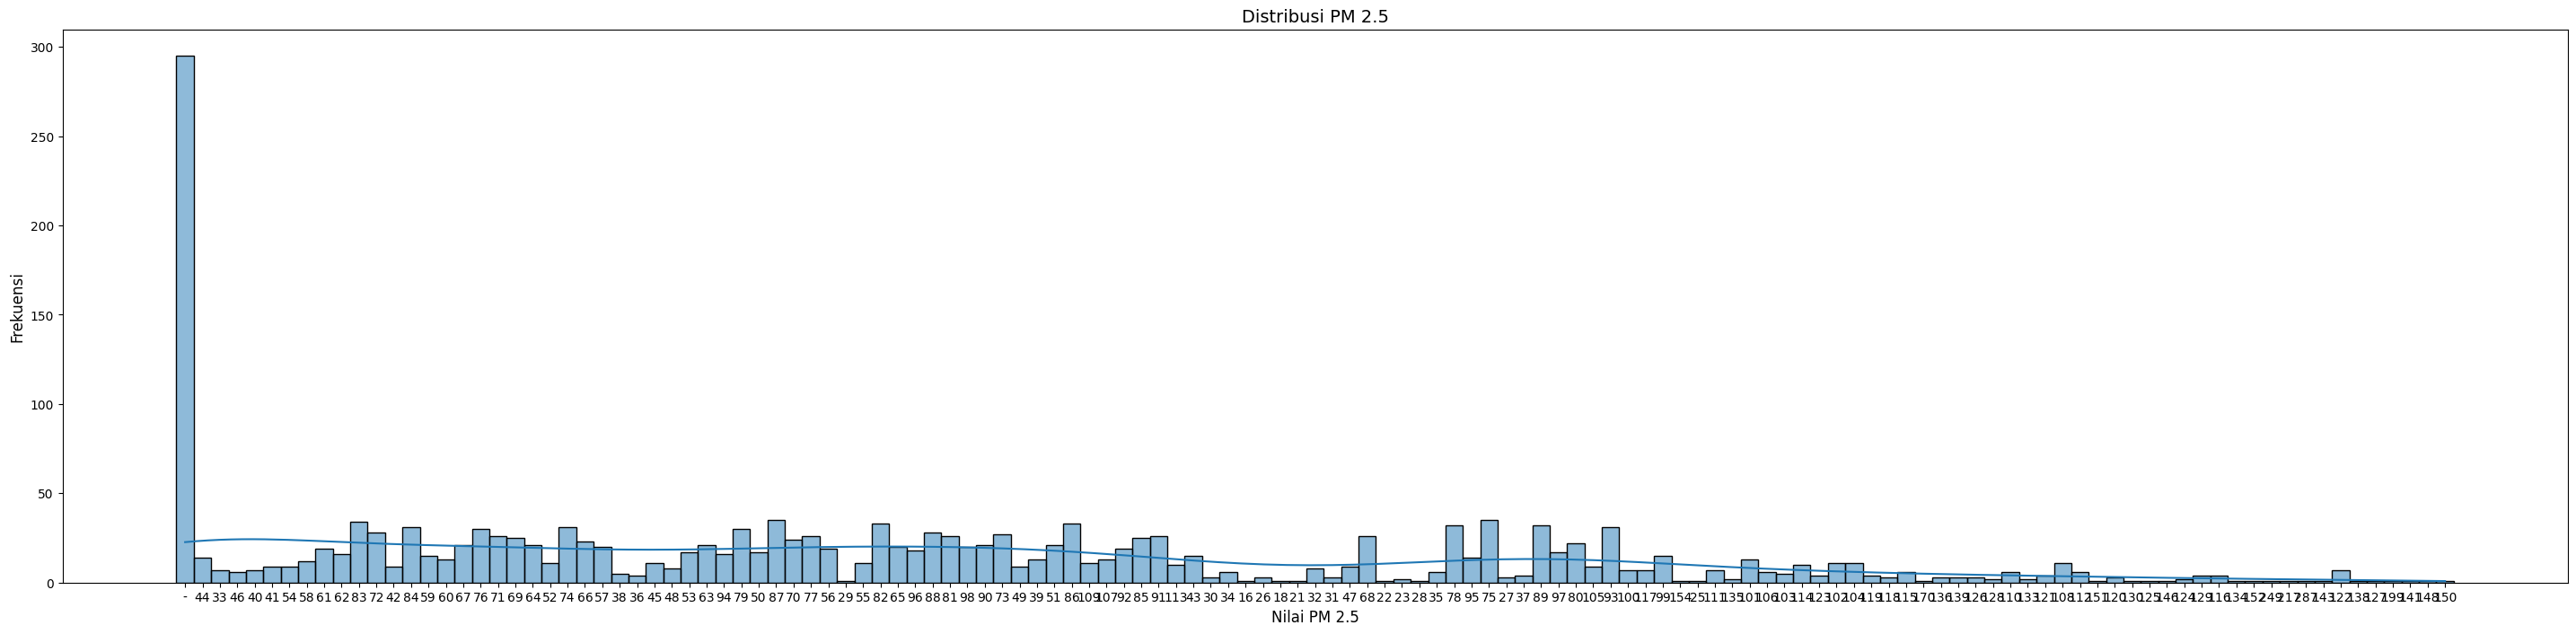

In [ ]:
plt.subplots(figsize=(36, 8))
sns.histplot(df['pm_duakomalima'], kde=True)
plt.title('Distribusi PM 2.5', fontsize=14) # Menambahkan judul
plt.xlabel('Nilai PM 2.5', fontsize=12) # Memberi label sumbu x
plt.ylabel('Frekuensi', fontsize=12) # Memberi label sumbu y
plt.xticks(fontsize=10) # Mengatur ukuran font nilai pada sumbu x
plt.yticks(fontsize=10) # Mengatur ukuran font nilai pada sumbu y
plt.show()

### kolom Sulfur Dioksida(SO2)

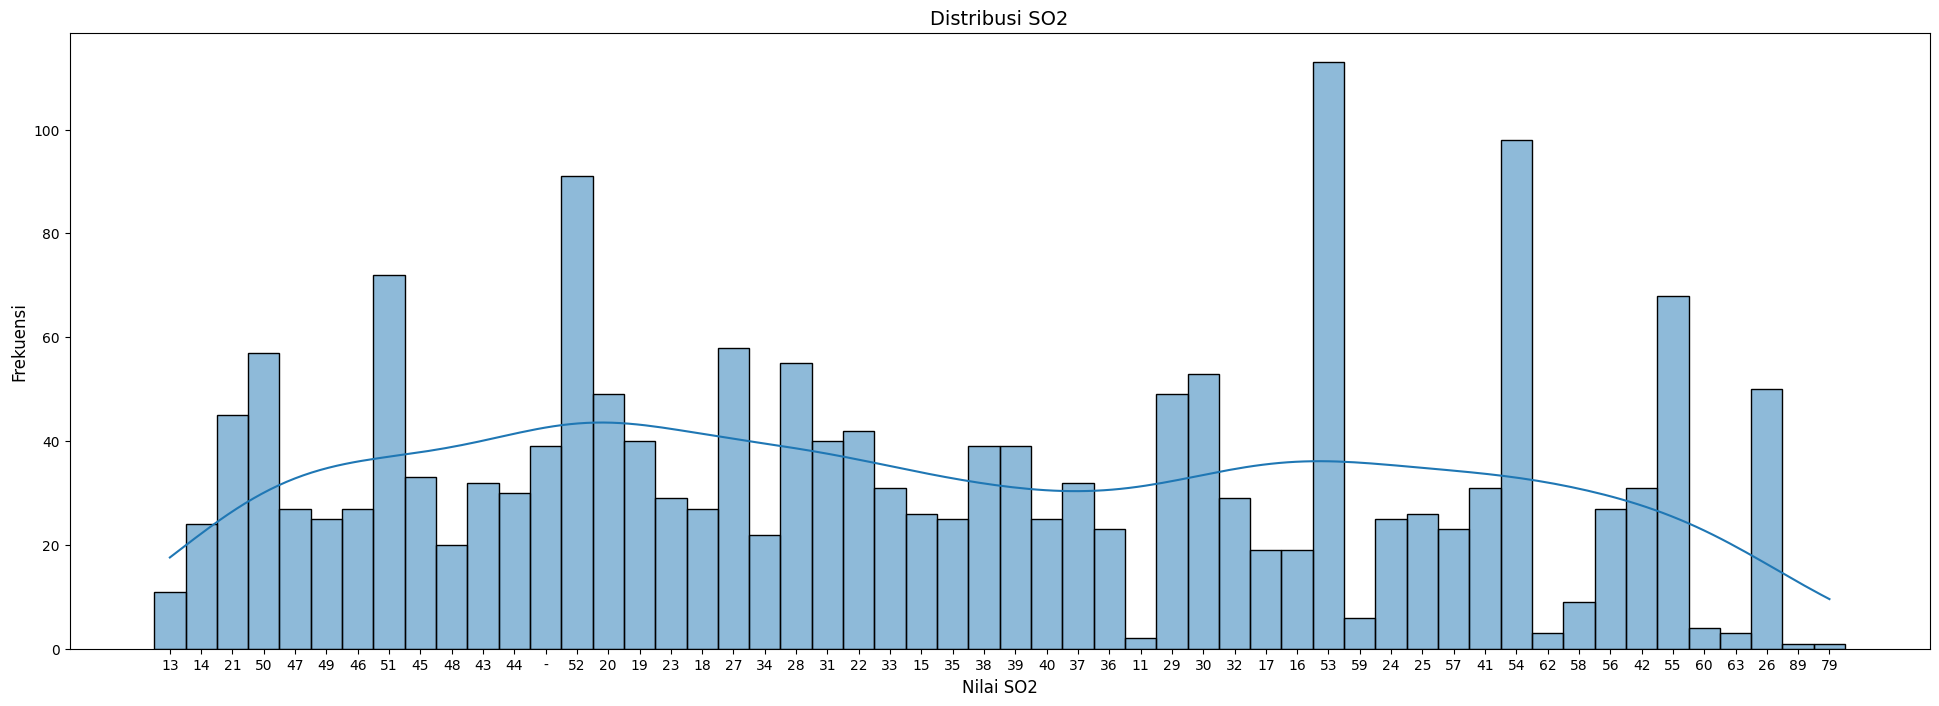

In [ ]:
plt.subplots(figsize=(24, 8))
sns.histplot(df['sulfur_dioksida'], kde=True)
plt.title('Distribusi SO2', fontsize=14) # Menambahkan judul
plt.xlabel('Nilai SO2', fontsize=12) # Memberi label sumbu x
plt.ylabel('Frekuensi', fontsize=12) # Memberi label sumbu y
plt.xticks(fontsize=10) # Mengatur ukuran font nilai pada sumbu x
plt.yticks(fontsize=10) # Mengatur ukuran font nilai pada sumbu y
plt.show()

### kolom Karbon Monoksida(CO)

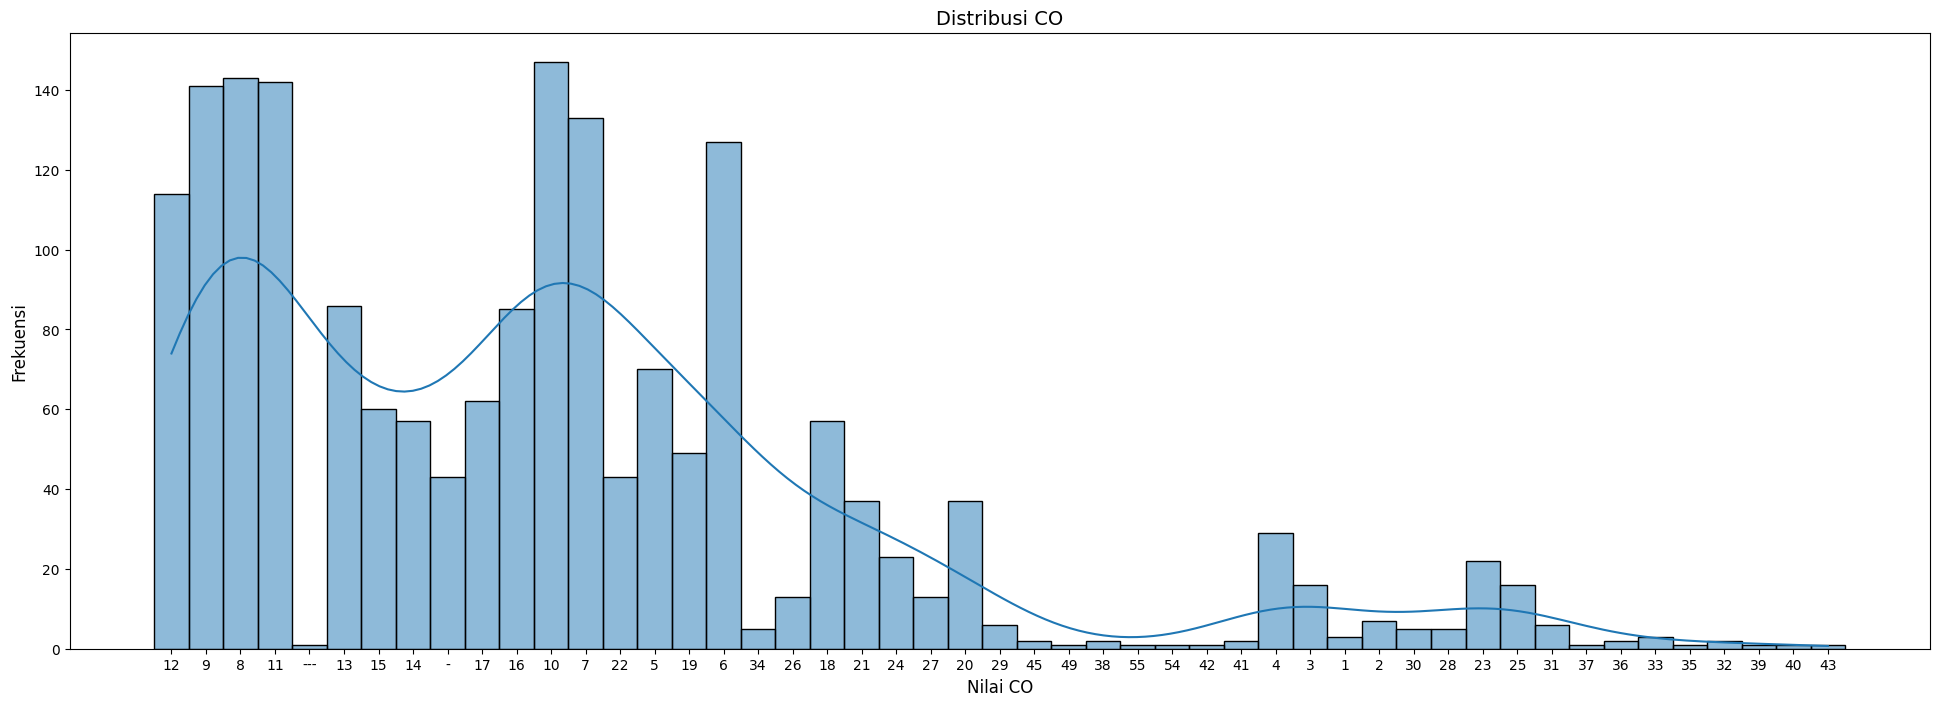

In [ ]:
plt.subplots(figsize=(24, 8))
sns.histplot(df['karbon_monoksida'], kde=True)
plt.title('Distribusi CO', fontsize=14) # Menambahkan judul
plt.xlabel('Nilai CO', fontsize=12) # Memberi label sumbu x
plt.ylabel('Frekuensi', fontsize=12) # Memberi label sumbu y
plt.xticks(fontsize=10) # Mengatur ukuran font nilai pada sumbu x
plt.yticks(fontsize=10) # Mengatur ukuran font nilai pada sumbu y
plt.show()

### kolom Ozon(O3)

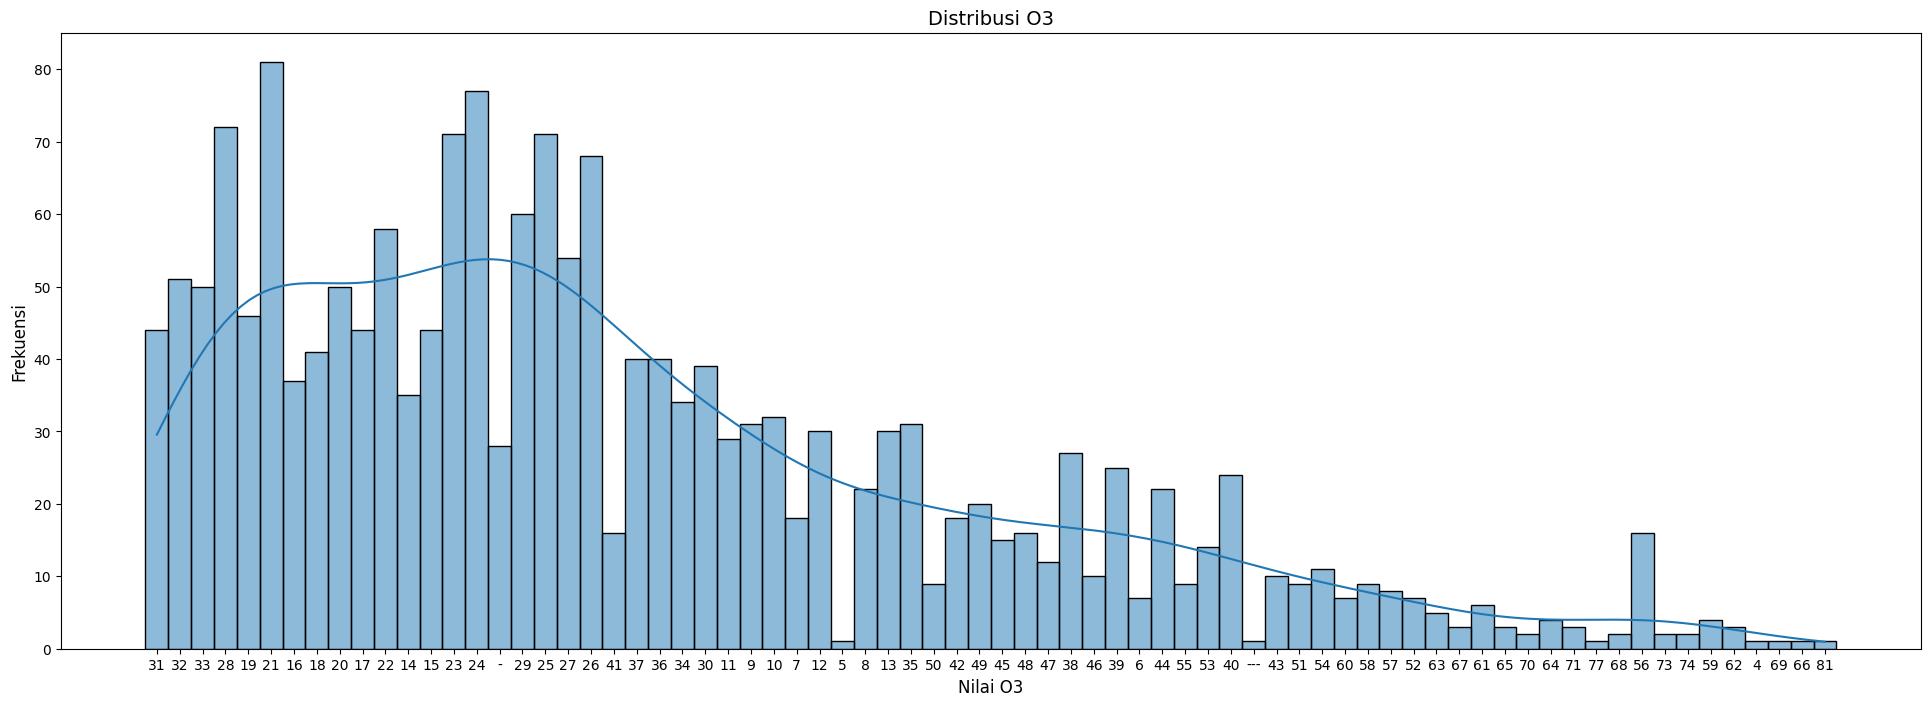

In [ ]:
plt.subplots(figsize=(24, 8))
sns.histplot(df['ozon'], kde=True)
plt.title('Distribusi O3', fontsize=14) # Menambahkan judul
plt.xlabel('Nilai O3', fontsize=12) # Memberi label sumbu x
plt.ylabel('Frekuensi', fontsize=12) # Memberi label sumbu y
plt.xticks(fontsize=10) # Mengatur ukuran font nilai pada sumbu x
plt.yticks(fontsize=10) # Mengatur ukuran font nilai pada sumbu y
plt.show()

### kolom Nitrogen Dioksida(NO2)

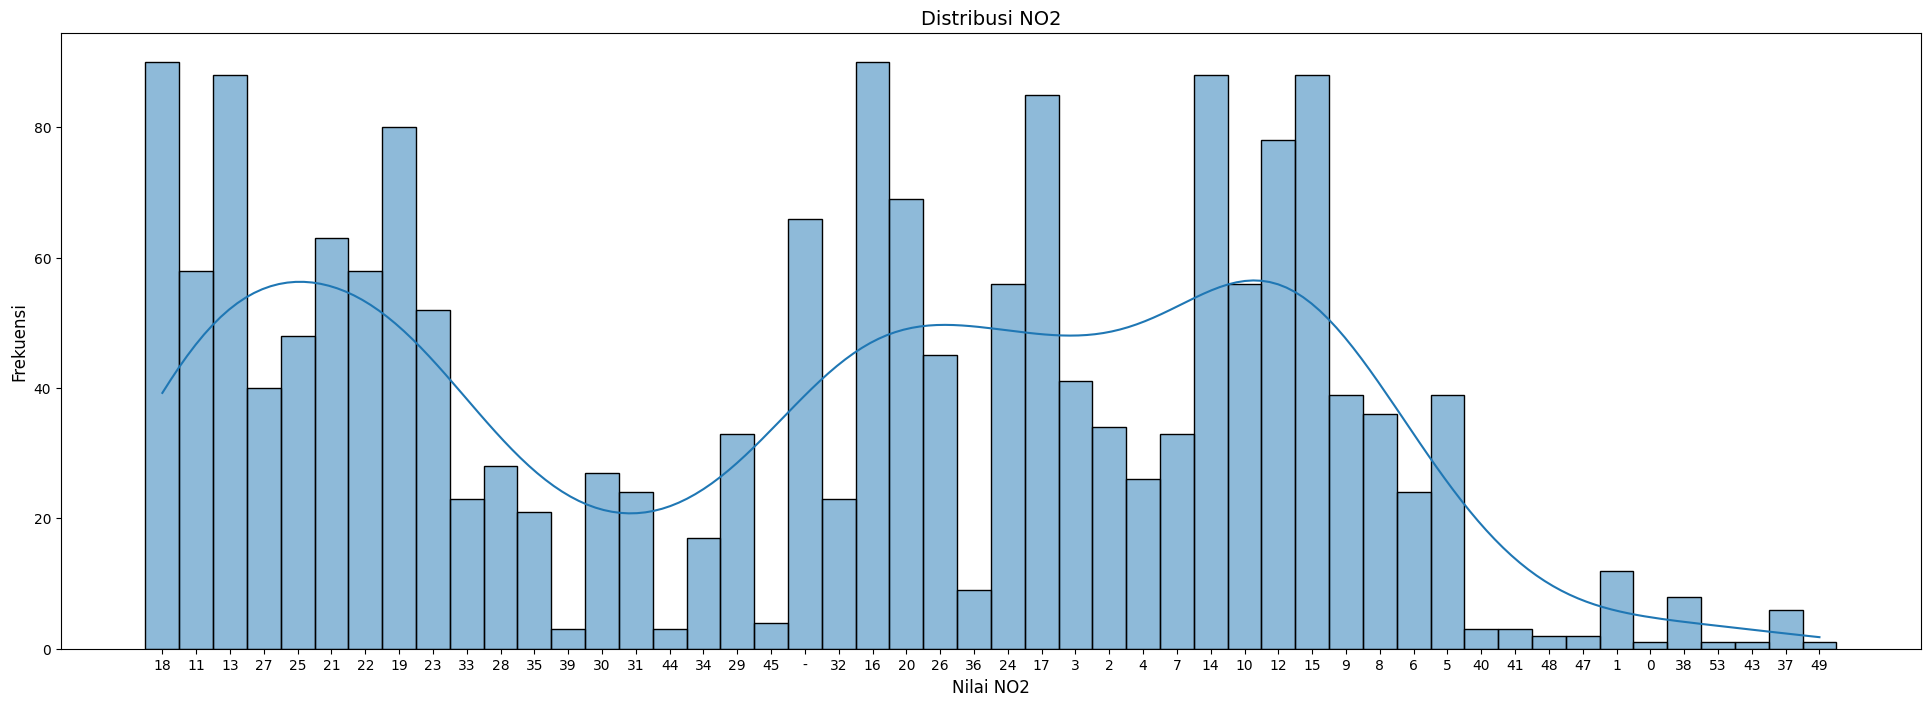

In [ ]:
plt.subplots(figsize=(24, 8))
sns.histplot(df['nitrogen_dioksida'], kde=True)
plt.title('Distribusi NO2', fontsize=14) # Menambahkan judul
plt.xlabel('Nilai NO2', fontsize=12) # Memberi label sumbu x
plt.ylabel('Frekuensi', fontsize=12) # Memberi label sumbu y
plt.xticks(fontsize=10) # Mengatur ukuran font nilai pada sumbu x
plt.yticks(fontsize=10) # Mengatur ukuran font nilai pada sumbu y
plt.show()

# Preprocessing

## Cleaning Data



### Mengubah nama kolom

In [ ]:
df = df.rename(columns={
    'pm_sepuluh' : 'PM10',
    'pm_duakomalima' : 'PM25',
    'sulfur_dioksida' : 'SO2',
    'karbon_monoksida' : 'CO',
    'ozon' : 'O3',
    'nitrogen_dioksida' : 'NO2'
})
df

,_id,periode_data,tanggal,stasiun,PM10,PM25,SO2,CO,O3,NO2,max,parameter_pencemar_kritis,kategori
0,1,202302,2023-02-25T00:00:00,DKI5 Kebon Jeruk Jakarta Barat,35,-,13,12,31,18,35,PM10,BAIK
1,2,202302,2023-02-26T00:00:00,DKI5 Kebon Jeruk Jakarta Barat,23,-,14,9,32,11,32,O3,BAIK
2,3,202302,2023-02-27T00:00:00,DKI5 Kebon Jeruk Jakarta Barat,20,-,13,8,33,13,33,O3,BAIK
3,4,202302,2023-02-28T00:00:00,DKI5 Kebon Jeruk Jakarta Barat,30,-,21,11,28,18,30,PM10,BAIK
4,5,202303,2023-03-01T00:00:00,DKI1 Bunderan HI,38,44,50,8,19,27,50,3,BAIK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,1821,202311,2023-11-26T00:00:00,DKI5 Kebon Jeruk,48,71,33,21,44,20,71,PM25,SEDANG
1821,1822,202311,2023-11-27T00:00:00,DKI5 Kebon Jeruk,51,76,32,18,53,19,76,PM25,SEDANG
1822,1823,202311,2023-11-28T00:00:00,DKI5 Kebon Jeruk,56,88,33,20,48,21,88,PM25,SEDANG
1823,1824,202311,2023-11-29T00:00:00,DKI5 Kebon Jeruk,56,88,32,18,56,18,88,PM25,SEDANG


In [ ]:
print(df.columns)

Index(['_id', 'periode_data', 'tanggal', 'stasiun', 'PM10', 'PM25', 'SO2',
       'CO', 'O3', 'NO2', 'max', 'parameter_pencemar_kritis', 'kategori'],
      dtype='object')


### Mengubah atribut bertipe objek menjadi numerik

In [ ]:
# Misalkan kamu ingin mengonversi kolom 'kolom1' dan 'kolom2' menjadi tipe integer
df[['PM10', 'PM25', 'SO2', 'CO', 'O3', 'NO2', 'max']] = df[['PM10', 'PM25', 'SO2', 'CO', 'O3', 'NO2', 'max']].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Mengubah tipe data dari kolom 'kategori' menjadi tipe 'category' bukan object
df['kategori'] = df.kategori.astype('category')

# Menampilkan hasil
df.dtypes

,0
_id,int64
periode_data,int64
tanggal,object
stasiun,object
PM10,int64
PM25,int64
SO2,int64
CO,int64
O3,int64
NO2,int64


### Menyamakan value kolom 'parameter_pencemar_kritis'



In [ ]:
df['parameter_pencemar_kritis'].unique()

array(['PM10', 'O3', '3', '2', nan, '1', '5', 'SO2', 'PM25', '-'],
      dtype=object)

In [ ]:
kategori_parameter_pencemar_kritis = {
    '1': 'PM10',
    '2': 'PM25',
    '3': 'SO2',
    '4': 'CO',
    '5': 'O3',
    'PM10': 'PM10',
    'PM25': 'PM25',
    'SO2': 'SO2',
    'CO': 'CO',
    'O3': 'O3'
}

# Menerapkan pemetaan
df['parameter_pencemar_kritis'] = df['parameter_pencemar_kritis'].map(kategori_parameter_pencemar_kritis)

df

,_id,periode_data,tanggal,stasiun,PM10,PM25,SO2,CO,O3,NO2,max,parameter_pencemar_kritis,kategori
0,1,202302,2023-02-25T00:00:00,DKI5 Kebon Jeruk Jakarta Barat,35,0,13,12,31,18,35,PM10,BAIK
1,2,202302,2023-02-26T00:00:00,DKI5 Kebon Jeruk Jakarta Barat,23,0,14,9,32,11,32,O3,BAIK
2,3,202302,2023-02-27T00:00:00,DKI5 Kebon Jeruk Jakarta Barat,20,0,13,8,33,13,33,O3,BAIK
3,4,202302,2023-02-28T00:00:00,DKI5 Kebon Jeruk Jakarta Barat,30,0,21,11,28,18,30,PM10,BAIK
4,5,202303,2023-03-01T00:00:00,DKI1 Bunderan HI,38,44,50,8,19,27,50,SO2,BAIK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,1821,202311,2023-11-26T00:00:00,DKI5 Kebon Jeruk,48,71,33,21,44,20,71,PM25,SEDANG
1821,1822,202311,2023-11-27T00:00:00,DKI5 Kebon Jeruk,51,76,32,18,53,19,76,PM25,SEDANG
1822,1823,202311,2023-11-28T00:00:00,DKI5 Kebon Jeruk,56,88,33,20,48,21,88,PM25,SEDANG
1823,1824,202311,2023-11-29T00:00:00,DKI5 Kebon Jeruk,56,88,32,18,56,18,88,PM25,SEDANG


### Menghapus data kosong

In [ ]:
df.isnull().sum()

,0
_id,0
periode_data,0
tanggal,0
stasiun,0
PM10,0
PM25,0
SO2,0
CO,0
O3,0
NO2,0


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
_id,0
periode_data,0
tanggal,0
stasiun,0
PM10,0
PM25,0
SO2,0
CO,0
O3,0
NO2,0


### Mengisi data bernilai 0

Setiap data pada kolom PM10, PM25, SO2, CO, O3, dan NO2 yang bernilai 0 akan diisi dengan nilai rata-rata dari kolom tersebut

In [ ]:
df.PM10 = df.PM10.replace(0, df.PM10.mean())
df.PM25 = df.PM25.replace(0, df.PM25.mean())
df.SO2 = df.SO2.replace(0, df.SO2.mean())
df.CO = df.CO.replace(0, df.CO.mean())
df.O3 = df.O3.replace(0, df.O3.mean())
df.NO2 = df.NO2.replace(0, df.NO2.mean())

### Menyeragamkan nilai pada kolom stasiun

In [ ]:
df['stasiun'].unique()

array(['DKI5 Kebon Jeruk Jakarta Barat', 'DKI1 Bunderan HI',
       'DKI2 Kelapa Gading', 'DKI3 Jagakarsa', 'DKI4 Lubang Buaya',
       'DKI5 Kebon Jeruk'], dtype=object)

In [ ]:
# Menggunakan iterrows() untuk mengganti nilai pada kolom 'kolom1'
for index, row in df.iterrows():
    if row['stasiun'] == 'DKI5 Kebon Jeruk Jakarta Barat':
        df.loc[index, 'stasiun'] = 'DKI5 Kebon Jeruk'

df

,_id,periode_data,tanggal,stasiun,PM10,PM25,SO2,CO,O3,NO2,max,parameter_pencemar_kritis,kategori
0,1,202302,2023-02-25T00:00:00,DKI5 Kebon Jeruk,35,0,13,12,31,18,35,PM10,BAIK
1,2,202302,2023-02-26T00:00:00,DKI5 Kebon Jeruk,23,0,14,9,32,11,32,O3,BAIK
2,3,202302,2023-02-27T00:00:00,DKI5 Kebon Jeruk,20,0,13,8,33,13,33,O3,BAIK
3,4,202302,2023-02-28T00:00:00,DKI5 Kebon Jeruk,30,0,21,11,28,18,30,PM10,BAIK
4,5,202303,2023-03-01T00:00:00,DKI1 Bunderan HI,38,44,50,8,19,27,50,SO2,BAIK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,1821,202311,2023-11-26T00:00:00,DKI5 Kebon Jeruk,48,71,33,21,44,20,71,PM25,SEDANG
1821,1822,202311,2023-11-27T00:00:00,DKI5 Kebon Jeruk,51,76,32,18,53,19,76,PM25,SEDANG
1822,1823,202311,2023-11-28T00:00:00,DKI5 Kebon Jeruk,56,88,33,20,48,21,88,PM25,SEDANG
1823,1824,202311,2023-11-29T00:00:00,DKI5 Kebon Jeruk,56,88,32,18,56,18,88,PM25,SEDANG


## Visualisasi

In [ ]:
df.describe()

,_id,periode_data,PM10,PM25,SO2,CO,O3,NO2,max
count,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000
mean,912.929047,202297.944013,51.953913,75.993741,38.060600,12.648702,28.263364,17.792747,74.315410
std,527.117341,26.528894,15.062683,22.427080,13.334266,6.591031,13.033406,8.610443,23.927575
min,1.000000,202212.000000,3.000000,16.000000,11.000000,1.000000,4.000000,1.000000,20.000000
25%,456.500000,202303.000000,44.000000,65.973392,27.000000,8.000000,20.000000,12.000000,57.000000
50%,914.500000,202306.000000,52.000000,73.000000,38.000000,11.000000,26.000000,17.000000,74.000000
75%,1368.250000,202308.000000,62.000000,88.000000,51.000000,16.000000,35.000000,23.000000,88.000000
max,1825.000000,202311.000000,163.000000,287.000000,89.000000,55.000000,81.000000,53.000000,287.000000


### kolom stasiun

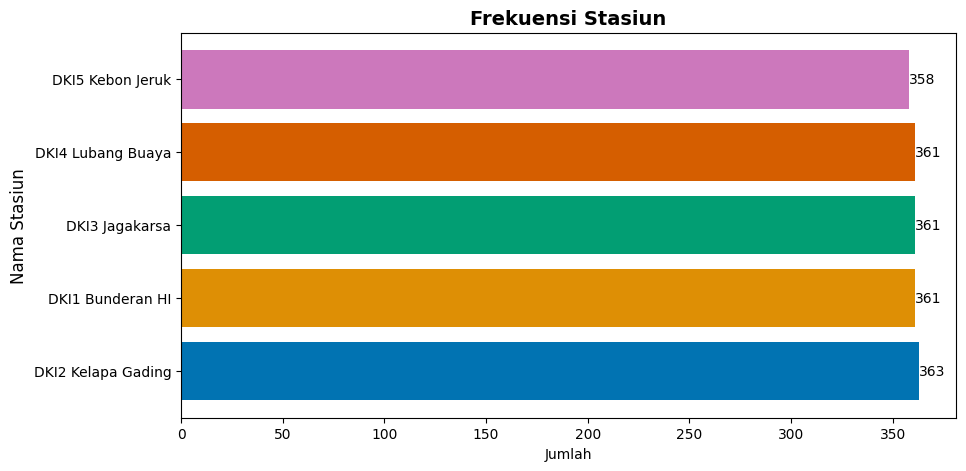

In [ ]:
cnts = df['stasiun'].value_counts()

fig, axes = plt.subplots(figsize=(10, 5))

bars = axes.barh(cnts.index, cnts.values, color=sns.color_palette('colorblind'))
axes.bar_label(bars)

axes.set_title('Frekuensi Stasiun', fontsize=14, fontweight='bold')
axes.set_ylabel('Nama Stasiun', fontsize=12)
axes.get_yaxis()
axes.set_xlabel('Jumlah')

plt.show()

### kolom kategori

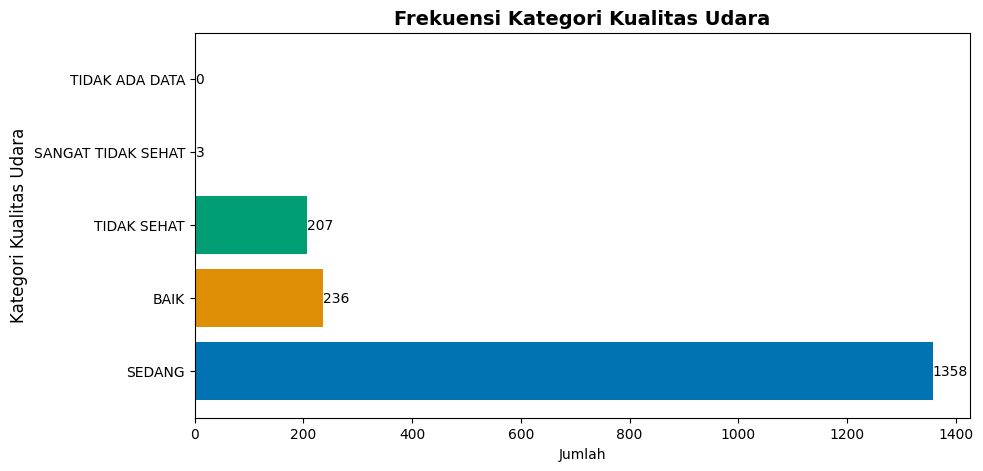

In [ ]:
cnts = df['kategori'].value_counts()

fig, axes = plt.subplots(figsize=(10, 5))

bars = axes.barh(cnts.index, cnts.values, color=sns.color_palette('colorblind'))
axes.bar_label(bars)

axes.set_title('Frekuensi Kategori Kualitas Udara', fontsize=14, fontweight='bold')
axes.set_ylabel('Kategori Kualitas Udara', fontsize=12)
axes.get_yaxis()
axes.set_xlabel('Jumlah')

plt.show()

### Kolom PM 10

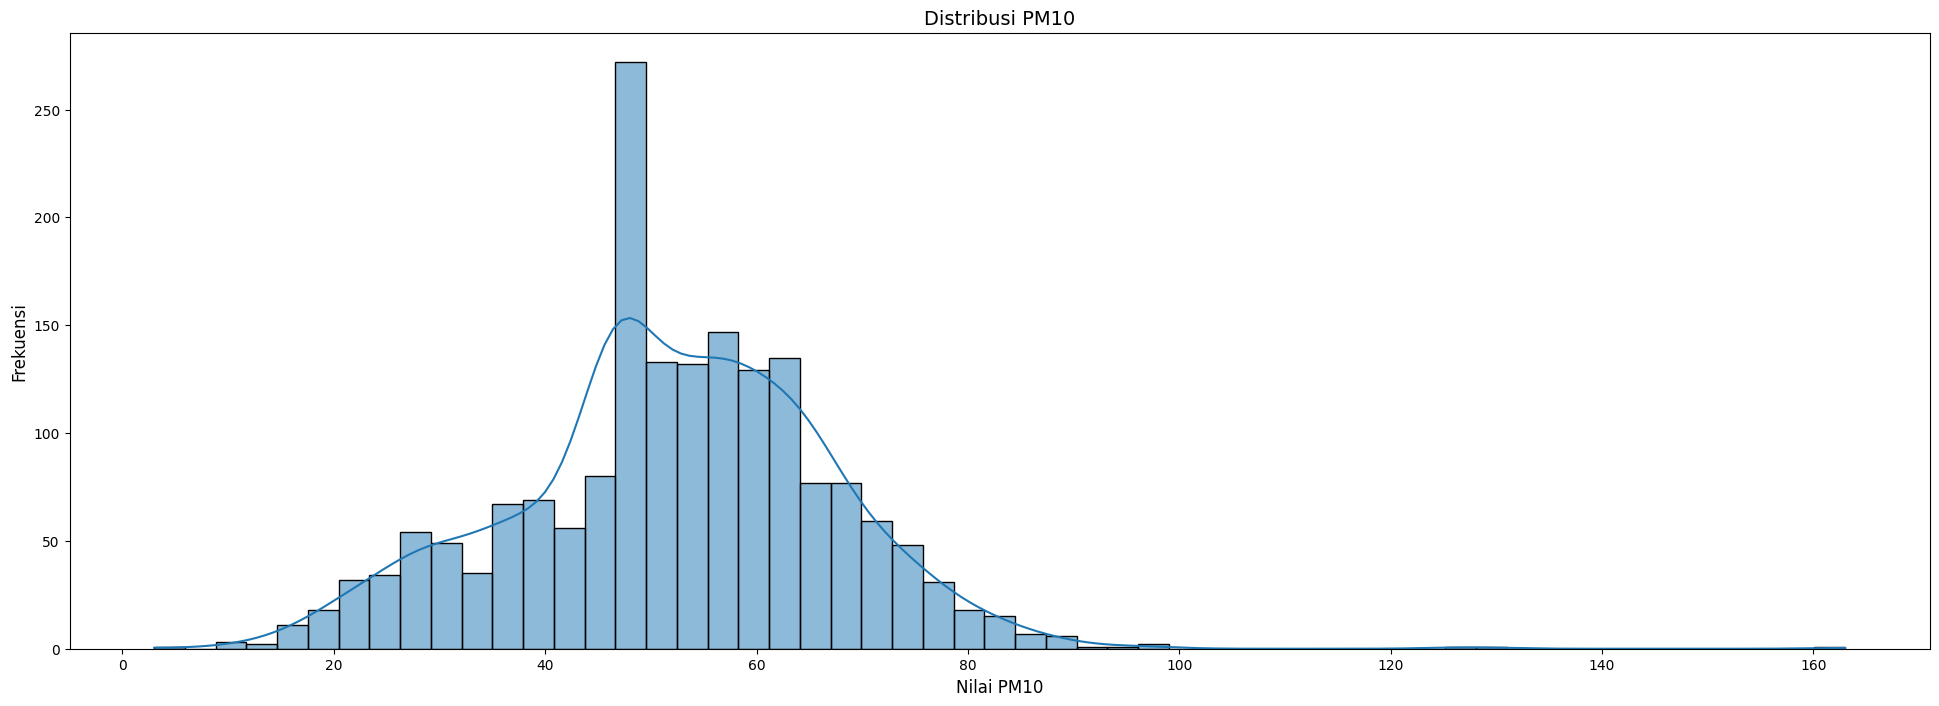

In [ ]:
plt.subplots(figsize=(24, 8))
sns.histplot(df['PM10'], kde=True)
plt.title('Distribusi PM10', fontsize=14) # Menambahkan judul
plt.xlabel('Nilai PM10', fontsize=12) # Memberi label sumbu x
plt.ylabel('Frekuensi', fontsize=12) # Memberi label sumbu y
plt.xticks(fontsize=10) # Mengatur ukuran font nilai pada sumbu x
plt.yticks(fontsize=10) # Mengatur ukuran font nilai pada sumbu y
plt.show()

### Kolom PM 2.5

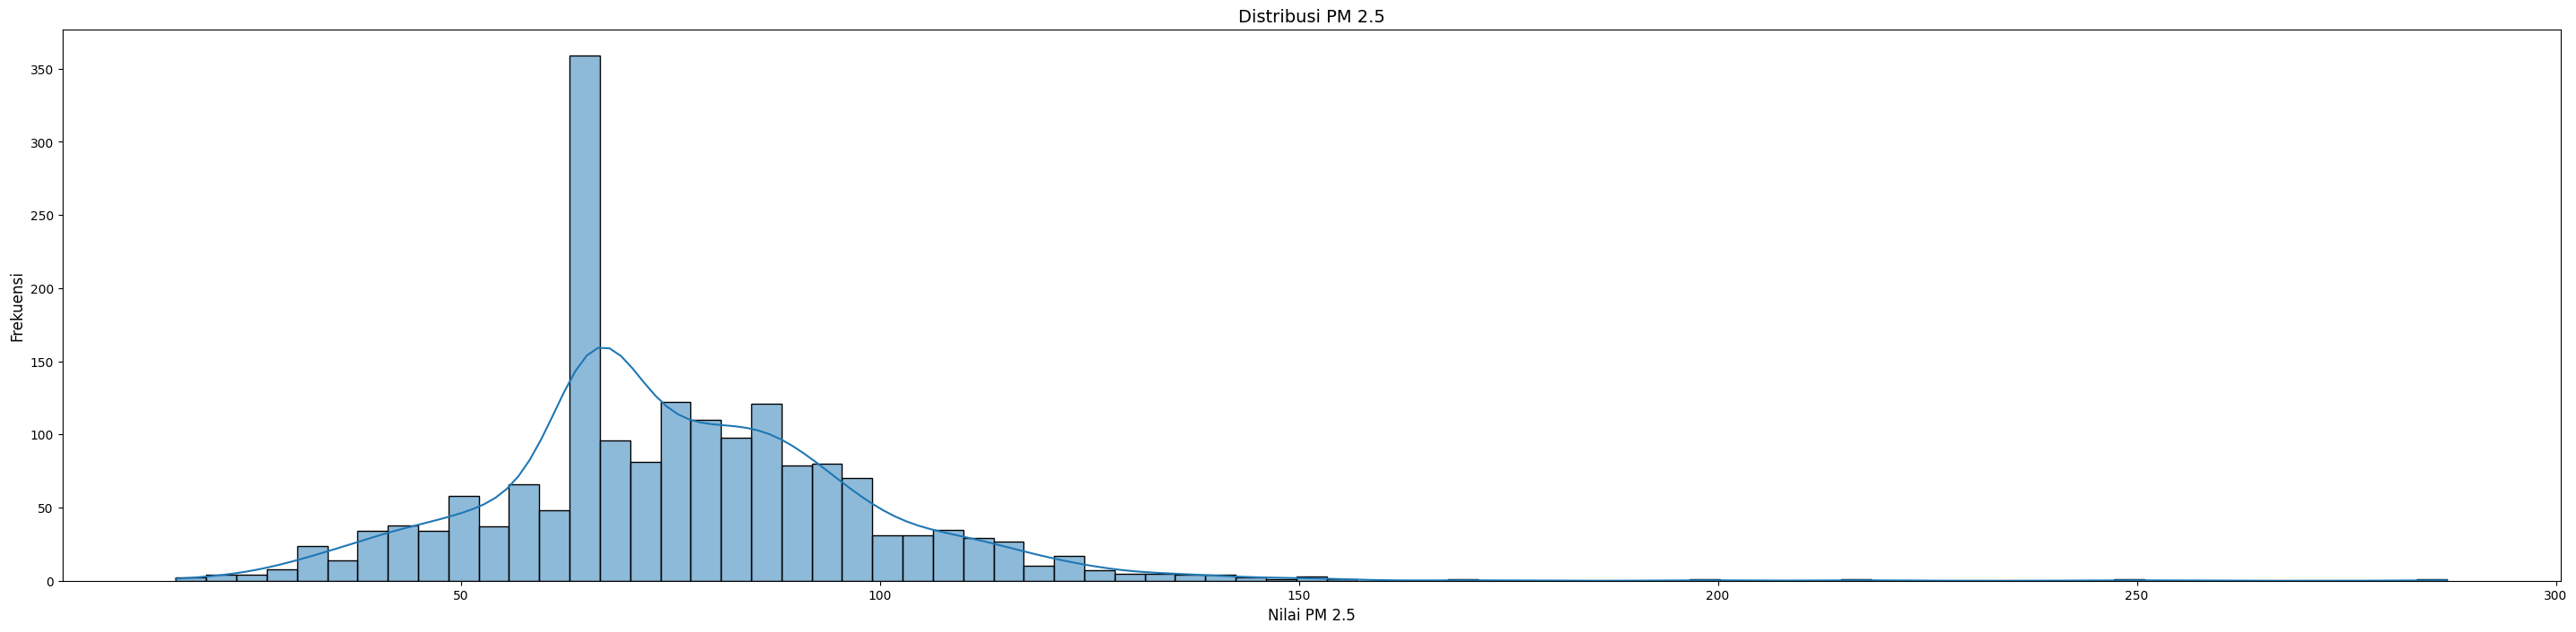

In [ ]:
plt.subplots(figsize=(36, 8))
sns.histplot(df['PM25'], kde=True)
plt.title('Distribusi PM 2.5', fontsize=14) # Menambahkan judul
plt.xlabel('Nilai PM 2.5', fontsize=12) # Memberi label sumbu x
plt.ylabel('Frekuensi', fontsize=12) # Memberi label sumbu y
plt.xticks(fontsize=10) # Mengatur ukuran font nilai pada sumbu x
plt.yticks(fontsize=10) # Mengatur ukuran font nilai pada sumbu y
plt.show()

### Kolom SO2

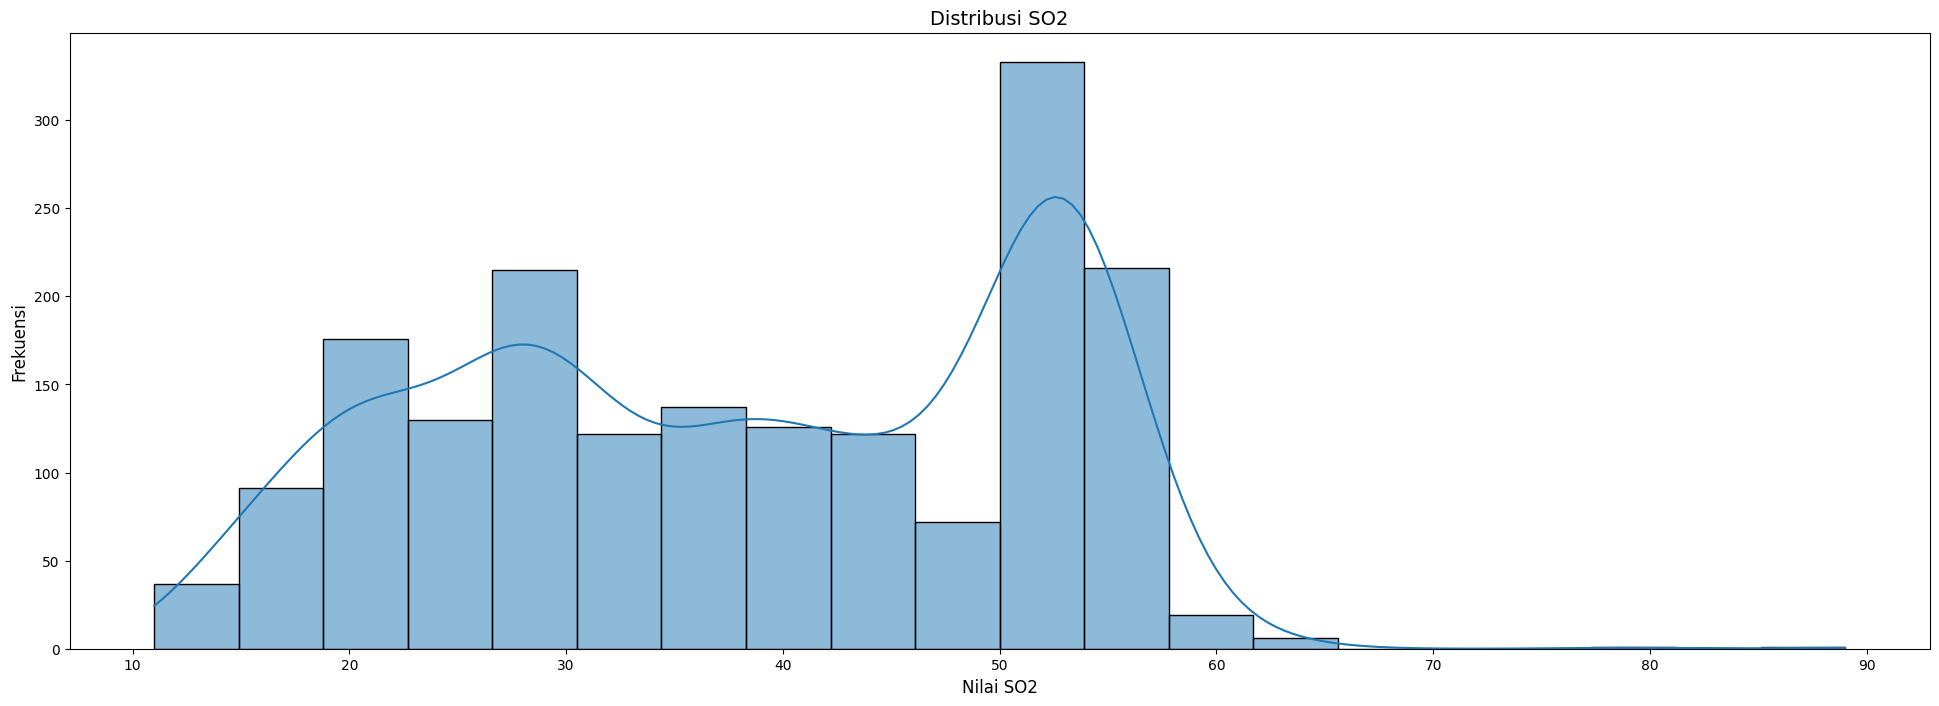

In [ ]:
plt.subplots(figsize=(24, 8))
sns.histplot(df['SO2'], kde=True)
plt.title('Distribusi SO2', fontsize=14) # Menambahkan judul
plt.xlabel('Nilai SO2', fontsize=12) # Memberi label sumbu x
plt.ylabel('Frekuensi', fontsize=12) # Memberi label sumbu y
plt.xticks(fontsize=10) # Mengatur ukuran font nilai pada sumbu x
plt.yticks(fontsize=10) # Mengatur ukuran font nilai pada sumbu y
plt.show()

### Kolom CO

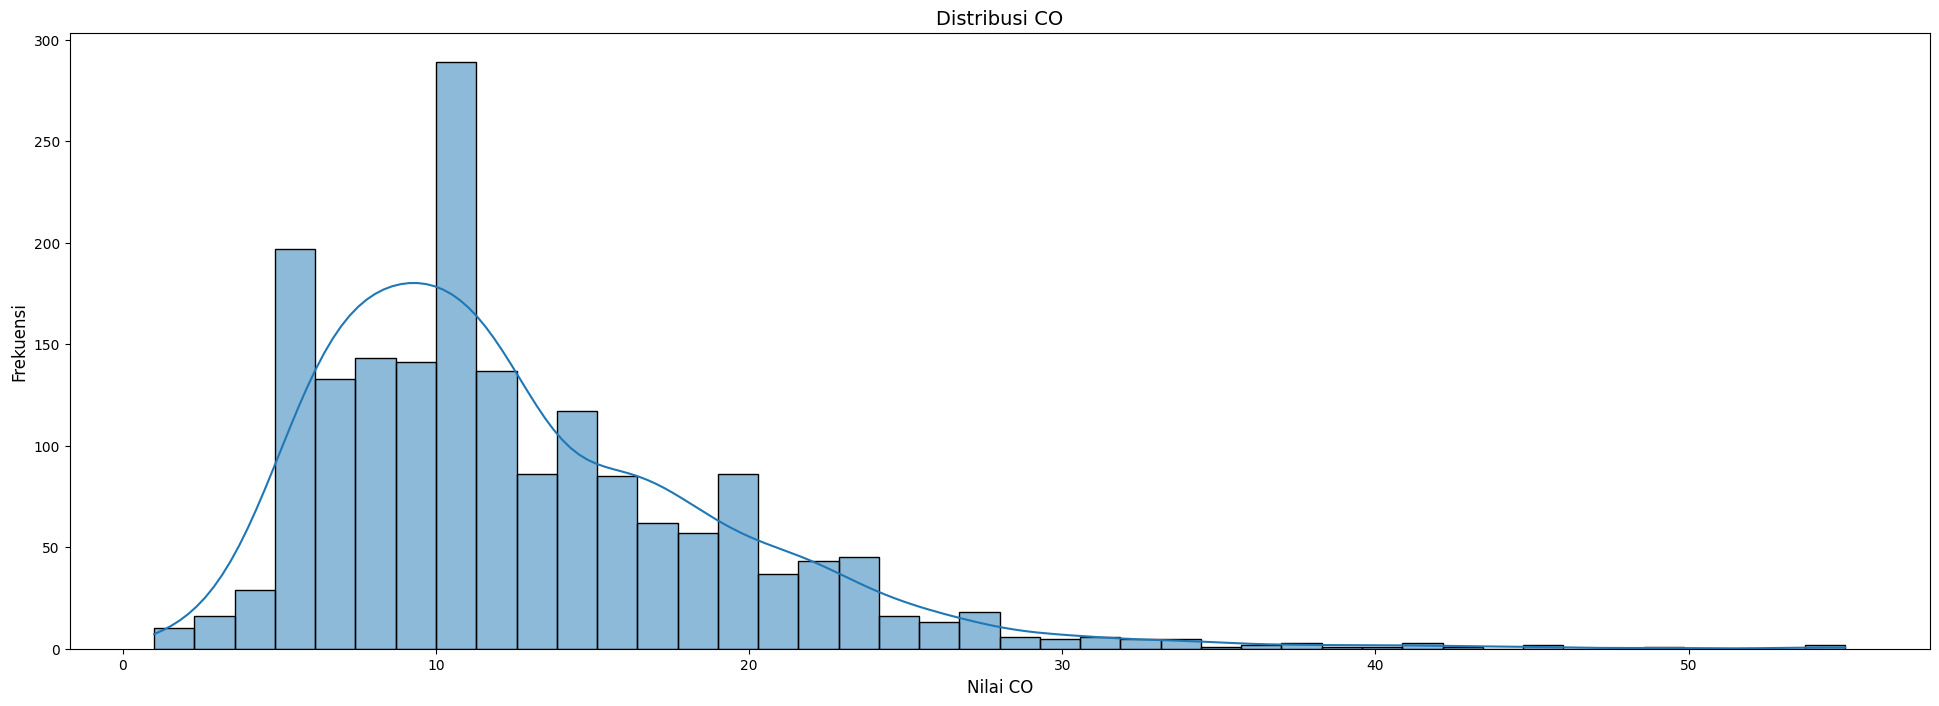

In [ ]:
plt.subplots(figsize=(24, 8))
sns.histplot(df['CO'], kde=True)
plt.title('Distribusi CO', fontsize=14) # Menambahkan judul
plt.xlabel('Nilai CO', fontsize=12) # Memberi label sumbu x
plt.ylabel('Frekuensi', fontsize=12) # Memberi label sumbu y
plt.xticks(fontsize=10) # Mengatur ukuran font nilai pada sumbu x
plt.yticks(fontsize=10) # Mengatur ukuran font nilai pada sumbu y
plt.show()

### Kolom O3

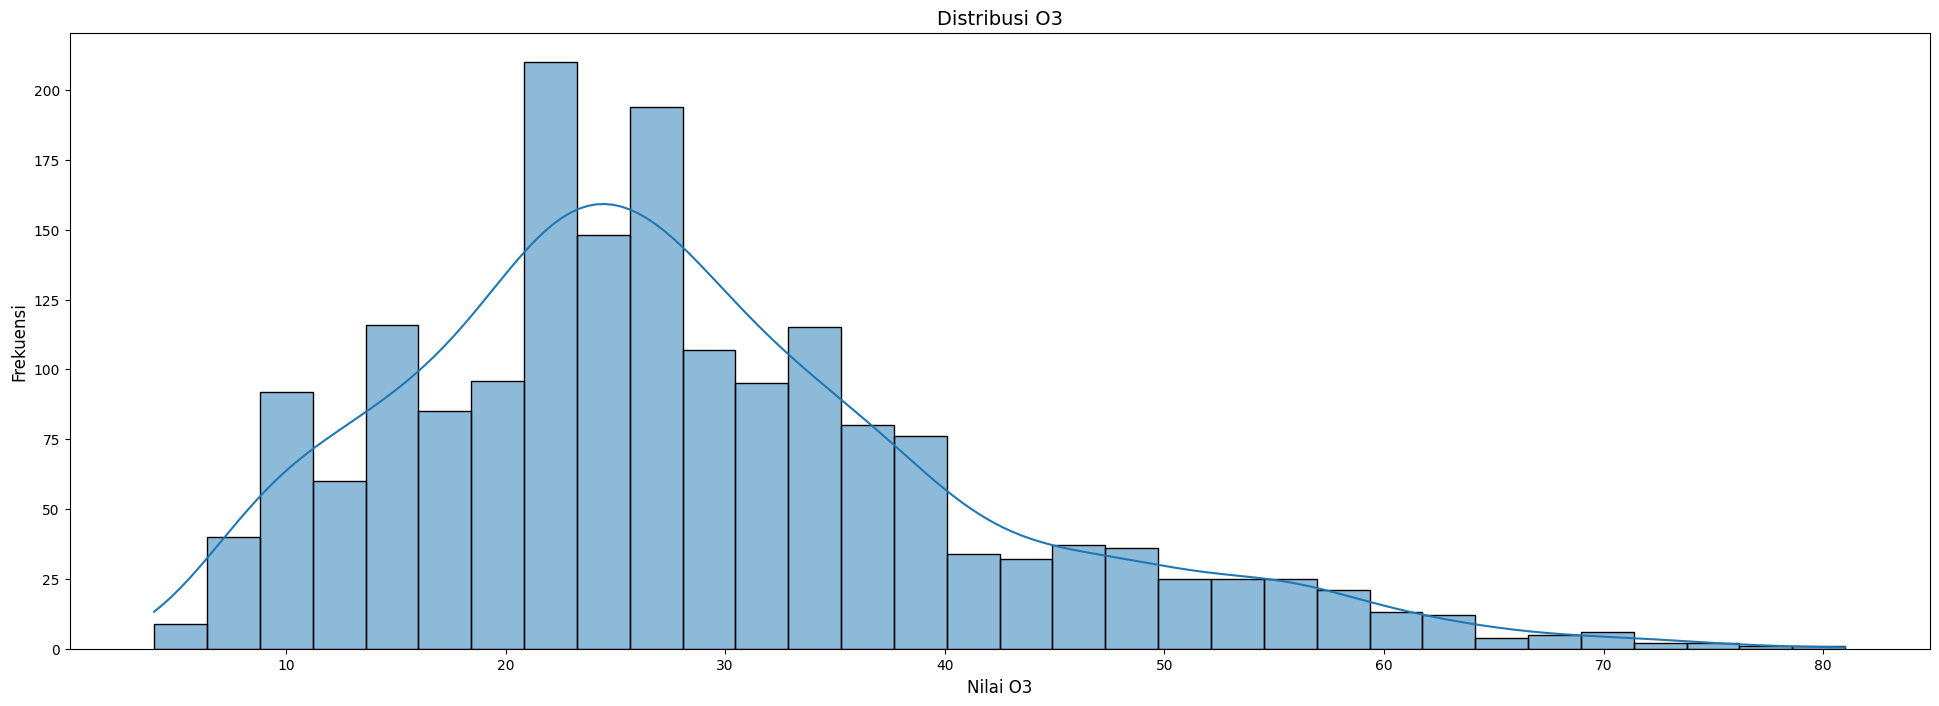

In [ ]:
plt.subplots(figsize=(24, 8))
sns.histplot(df['O3'], kde=True)
plt.title('Distribusi O3', fontsize=14) # Menambahkan judul
plt.xlabel('Nilai O3', fontsize=12) # Memberi label sumbu x
plt.ylabel('Frekuensi', fontsize=12) # Memberi label sumbu y
plt.xticks(fontsize=10) # Mengatur ukuran font nilai pada sumbu x
plt.yticks(fontsize=10) # Mengatur ukuran font nilai pada sumbu y
plt.show()

### Kolom NO2

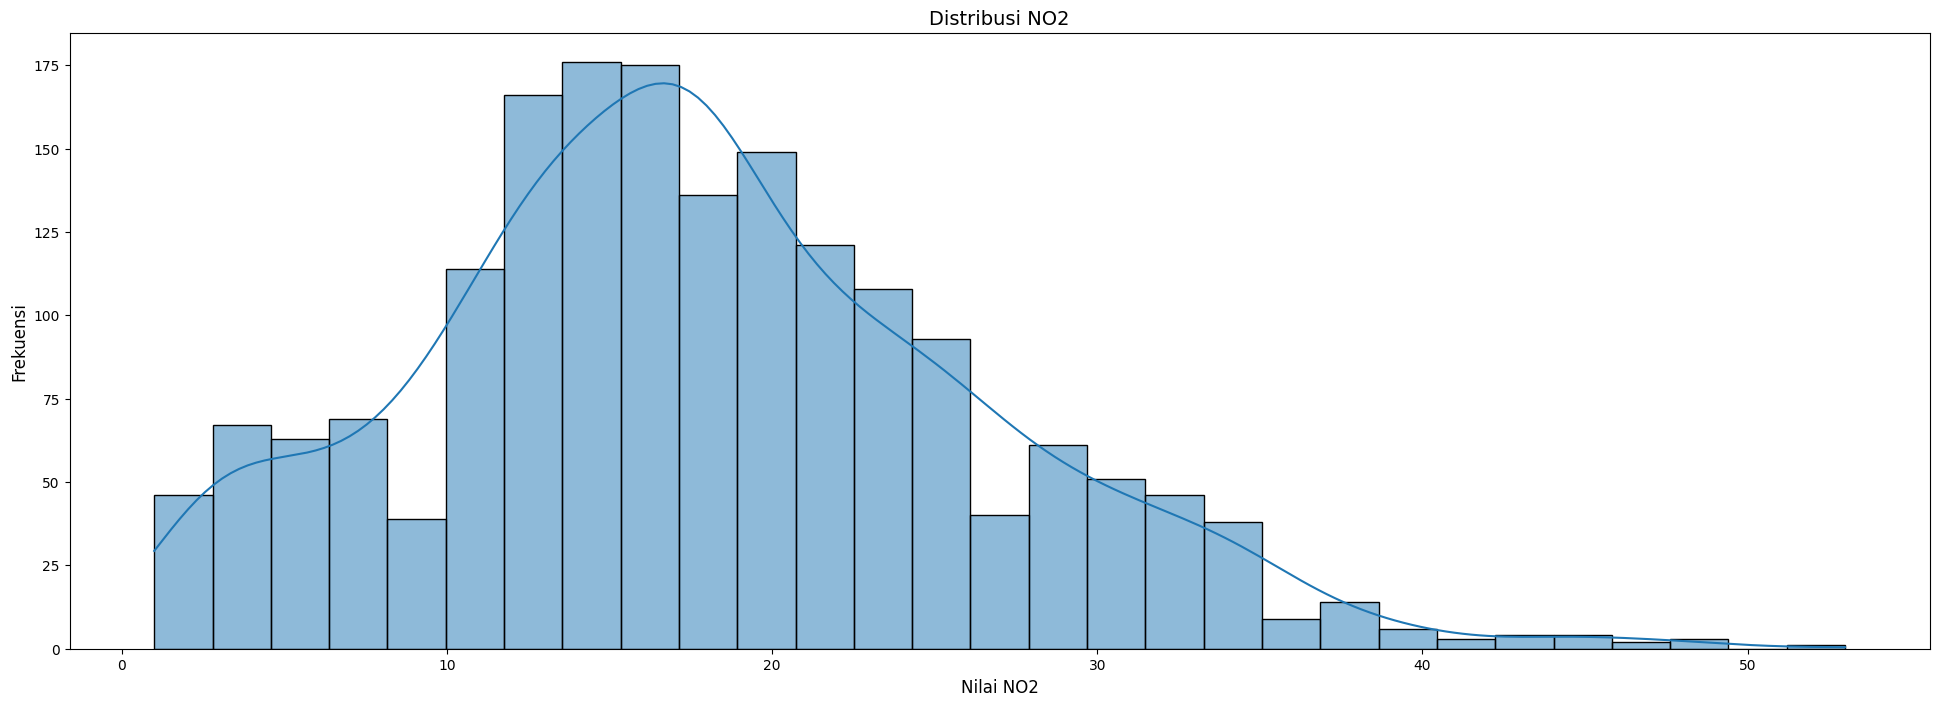

In [ ]:
plt.subplots(figsize=(24, 8))
sns.histplot(df['NO2'], kde=True)
plt.title('Distribusi NO2', fontsize=14) # Menambahkan judul
plt.xlabel('Nilai NO2', fontsize=12) # Memberi label sumbu x
plt.ylabel('Frekuensi', fontsize=12) # Memberi label sumbu y
plt.xticks(fontsize=10) # Mengatur ukuran font nilai pada sumbu x
plt.yticks(fontsize=10) # Mengatur ukuran font nilai pada sumbu y
plt.show()

## Seleksi fitur

Menghapus kolom "_id" karena tidak diperlukan dan "periode_data" karena periode data adalah bulan dan tahun kapan data tersebut diambil serta "tanggal" dikarenakan kita tidak memerlukan kolom ini untuk pemodelan, hal ini tentunya sudah diwakili oleh tanggal data tersebut

In [ ]:
df.drop(columns=['_id', 'periode_data', 'tanggal', 'stasiun'], inplace=True)
# df.drop(columns=['_id', 'periode_data', 'tanggal'], inplace=True)
df

,PM10,PM25,SO2,CO,O3,NO2,max,parameter_pencemar_kritis,kategori
0,35.0,65.973392,13.0,12.0,31.0,18.0,35,PM10,BAIK
1,23.0,65.973392,14.0,9.0,32.0,11.0,32,O3,BAIK
2,20.0,65.973392,13.0,8.0,33.0,13.0,33,O3,BAIK
3,30.0,65.973392,21.0,11.0,28.0,18.0,30,PM10,BAIK
4,38.0,44.000000,50.0,8.0,19.0,27.0,50,SO2,BAIK
...,...,...,...,...,...,...,...,...,...
1820,48.0,71.000000,33.0,21.0,44.0,20.0,71,PM25,SEDANG
1821,51.0,76.000000,32.0,18.0,53.0,19.0,76,PM25,SEDANG
1822,56.0,88.000000,33.0,20.0,48.0,21.0,88,PM25,SEDANG
1823,56.0,88.000000,32.0,18.0,56.0,18.0,88,PM25,SEDANG


## Transformasi Data

### Konversi data kategori/objek menjadi numerik

In [ ]:
# # Transformasi data pada kolom 'stasiun' dengan satuan numerik
# df.stasiun = df.stasiun.replace({'DKI1 Bunderan HI':1, 'DKI2 Kelapa Gading':2, 'DKI3 Jagakarsa':3, 'DKI4 Lubang Buaya':4, 'DKI5 Kebon Jeruk':5})

# Transformasi data pada kolom 'parameter_pencemar_kritis' dengan satuan numerik
df.parameter_pencemar_kritis = df.parameter_pencemar_kritis.replace({'PM10':0, 'PM25':1,'SO2':2,'CO':3,'O3':4,'NO2':5})

# Print DataFrame yang telah diubah
df

<ipython-input-174-ec839ad49643>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.parameter_pencemar_kritis = df.parameter_pencemar_kritis.replace({'PM10':0, 'PM25':1,'SO2':2,'CO':3,'O3':4,'NO2':5})


,PM10,PM25,SO2,CO,O3,NO2,max,parameter_pencemar_kritis,kategori
0,35.0,65.973392,13.0,12.0,31.0,18.0,35,0,BAIK
1,23.0,65.973392,14.0,9.0,32.0,11.0,32,4,BAIK
2,20.0,65.973392,13.0,8.0,33.0,13.0,33,4,BAIK
3,30.0,65.973392,21.0,11.0,28.0,18.0,30,0,BAIK
4,38.0,44.000000,50.0,8.0,19.0,27.0,50,2,BAIK
...,...,...,...,...,...,...,...,...,...
1820,48.0,71.000000,33.0,21.0,44.0,20.0,71,1,SEDANG
1821,51.0,76.000000,32.0,18.0,53.0,19.0,76,1,SEDANG
1822,56.0,88.000000,33.0,20.0,48.0,21.0,88,1,SEDANG
1823,56.0,88.000000,32.0,18.0,56.0,18.0,88,1,SEDANG


### Normalisasi

Menggunakan Min Max (min max scalling)

- Untuk data yang bernilai 0, menunjukkan bahwa konsentrasi tersebut sangat
rendah atau tidak terdeteksi. Mengganti nilai 0 dengan nilai lain bisa mendistorsi informasi yang terkandung dalam data. Jika diganti nilai 0 dengan hasil normalisasi, kemungkinan akan menghilangkan informasi penting tentang rentang data asli.

In [ ]:
# nilai_ternormalisasi = (nilai_asli - nilai_minimum) / (nilai_maksimum - nilai_minimum)
# Pilih kolom yang ingin dinormalisasi
kolom_normalisasi = ['PM10', 'PM25', 'SO2', 'CO', 'O3', 'NO2']

# Buat MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler ke kolom numerik
scaler.fit(df[kolom_normalisasi])

# Transform semua kolom numerik
df[kolom_normalisasi] = scaler.transform(df[kolom_normalisasi])

# Print DataFrame yang telah dinormalisasi
df

,PM10,PM25,SO2,CO,O3,NO2,max,parameter_pencemar_kritis,kategori
0,0.20000,0.184404,0.025641,0.203704,0.350649,0.326923,35,0,BAIK
1,0.12500,0.184404,0.038462,0.148148,0.363636,0.192308,32,4,BAIK
2,0.10625,0.184404,0.025641,0.129630,0.376623,0.230769,33,4,BAIK
3,0.16875,0.184404,0.128205,0.185185,0.311688,0.326923,30,0,BAIK
4,0.21875,0.103321,0.500000,0.129630,0.194805,0.500000,50,2,BAIK
...,...,...,...,...,...,...,...,...,...
1820,0.28125,0.202952,0.282051,0.370370,0.519481,0.365385,71,1,SEDANG
1821,0.30000,0.221402,0.269231,0.314815,0.636364,0.346154,76,1,SEDANG
1822,0.33125,0.265683,0.282051,0.351852,0.571429,0.384615,88,1,SEDANG
1823,0.33125,0.265683,0.269231,0.314815,0.675325,0.326923,88,1,SEDANG


## Data Split

X sebagai data, dan y sebagai target/kelas

In [ ]:
X = df.drop(columns=['kategori'])
y = df['kategori']

X.shape, y.shape

((1804, 8), (1804,))

Membagi data menjadi 70% data latih dan 30% data test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modeling

## SVM - Utama

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

### Evaluasi Model


#### Data Latih

In [ ]:
y_pred_train_svm = svm.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_train_svm)
precision = precision_score(y_train, y_pred_train_svm, average='weighted')
recall = recall_score(y_train, y_pred_train_svm, average='weighted')
f1 = f1_score(y_train, y_pred_train_svm, average='weighted')

print(f'Accuracy : {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall   : {recall:.5f}')
print(f'F1 Score : {f1:.5f}')

Accuracy : 0.92235
Precision: 0.92316
Recall   : 0.92235
F1 Score : 0.91781


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


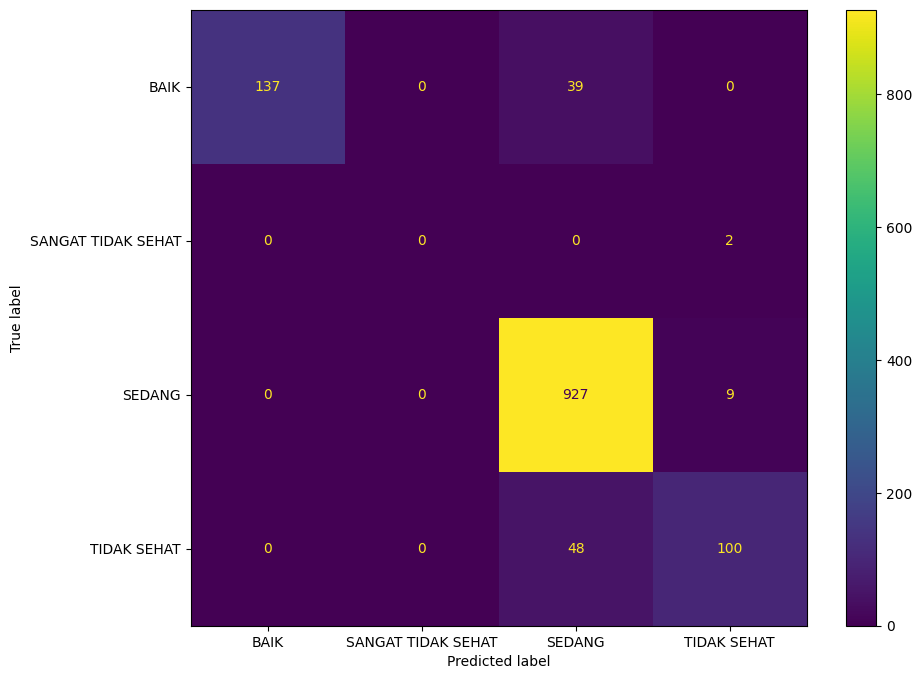

In [ ]:
# Ukuran visualisasi yang diinginkan (lebar, tinggi) dalam inci
figsize = (10, 8)

# Membuat figure dan axes dengan ukuran yang ditentukan
fig, ax = plt.subplots(figsize=figsize)

# Membuat ConfusionMatrixDisplay dengan ukuran yang ditentukan dan axes yang telah dibuat
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_svm, display_labels=svm.classes_, ax=ax)

#### Data Test

In [ ]:
y_pred_test_svm = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test_svm)
precision = precision_score(y_test, y_pred_test_svm, average='weighted')
recall = recall_score(y_test, y_pred_test_svm, average='weighted')
f1 = f1_score(y_test, y_pred_test_svm, average='weighted')

print(f'Accuracy : {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall   : {recall:.5f}')
print(f'F1 Score : {f1:.5f}')

Accuracy : 0.93542
Precision: 0.93511
Recall   : 0.93542
F1 Score : 0.93139


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


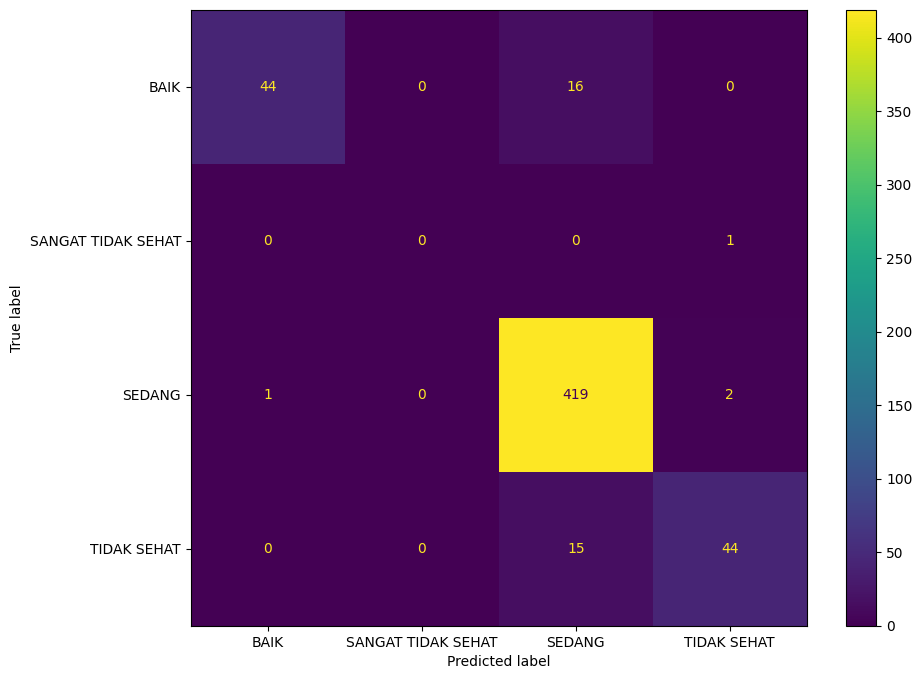

In [ ]:
# Ukuran visualisasi yang diinginkan (lebar, tinggi) dalam inci
figsize = (10, 8)

# Membuat figure dan axes dengan ukuran yang ditentukan
fig, ax = plt.subplots(figsize=figsize)

# Membuat ConfusionMatrixDisplay dengan ukuran yang ditentukan dan axes yang telah dibuat
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_svm, display_labels=svm.classes_, ax=ax)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Evaluasi Model


#### Data Latih

In [ ]:
y_pred_train_knn = knn.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_train_knn)
precision = precision_score(y_train, y_pred_train_knn, average='weighted')
recall = recall_score(y_train, y_pred_train_knn, average='weighted')
f1 = f1_score(y_train, y_pred_train_knn, average='weighted')

print(f'Accuracy : {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall   : {recall:.5f}')
print(f'F1 Score : {f1:.5f}')

Accuracy : 0.99762
Precision: 0.99606
Recall   : 0.99762
F1 Score : 0.99683


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


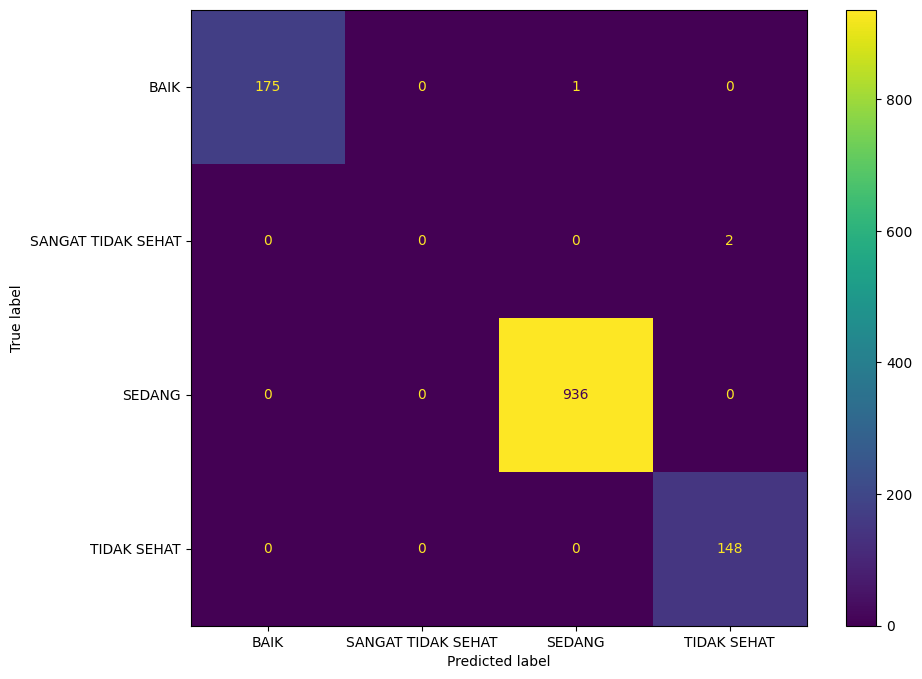

In [ ]:
# Ukuran visualisasi yang diinginkan (lebar, tinggi) dalam inci
figsize = (10, 8)

# Membuat figure dan axes dengan ukuran yang ditentukan
fig, ax = plt.subplots(figsize=figsize)

# Membuat ConfusionMatrixDisplay dengan ukuran yang ditentukan dan axes yang telah dibuat
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_knn, display_labels=knn.classes_, ax=ax)

#### Data Test

In [ ]:
y_pred_test_knn = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test_knn)
precision = precision_score(y_test, y_pred_test_knn, average='weighted')
recall = recall_score(y_test, y_pred_test_knn, average='weighted')
f1 = f1_score(y_test, y_pred_test_knn, average='weighted')

print(f'Accuracy : {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall   : {recall:.5f}')
print(f'F1 Score : {f1:.5f}')

Accuracy : 0.99631
Precision: 0.99450
Recall   : 0.99631
F1 Score : 0.99539


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


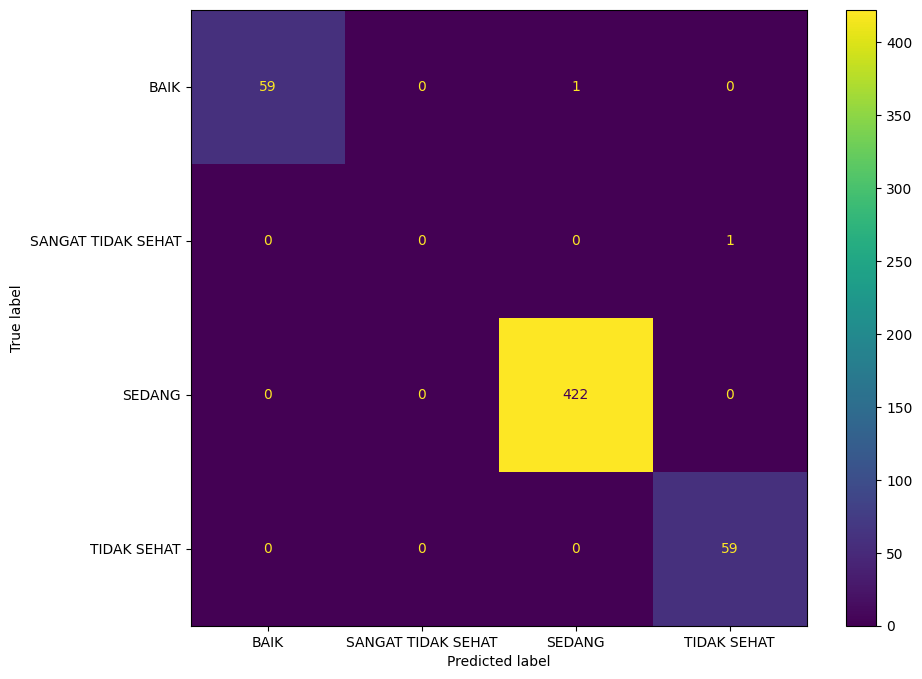

In [ ]:
# Ukuran visualisasi yang diinginkan (lebar, tinggi) dalam inci
figsize = (10, 8)

# Membuat figure dan axes dengan ukuran yang ditentukan
fig, ax = plt.subplots(figsize=figsize)

# Membuat ConfusionMatrixDisplay dengan ukuran yang ditentukan dan axes yang telah dibuat
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_knn, display_labels=knn.classes_, ax=ax)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

### Evaluasi Model


#### Data Latih

In [ ]:
y_pred_train_nb = nb.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_train_nb)
precision = precision_score(y_train, y_pred_train_nb, average='weighted')
recall = recall_score(y_train, y_pred_train_nb, average='weighted')
f1 = f1_score(y_train, y_pred_train_nb, average='weighted')

print(f'Accuracy : {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall   : {recall:.5f}')
print(f'F1 Score : {f1:.5f}')

Accuracy : 0.75436
Precision: 0.87091
Recall   : 0.75436
F1 Score : 0.77610


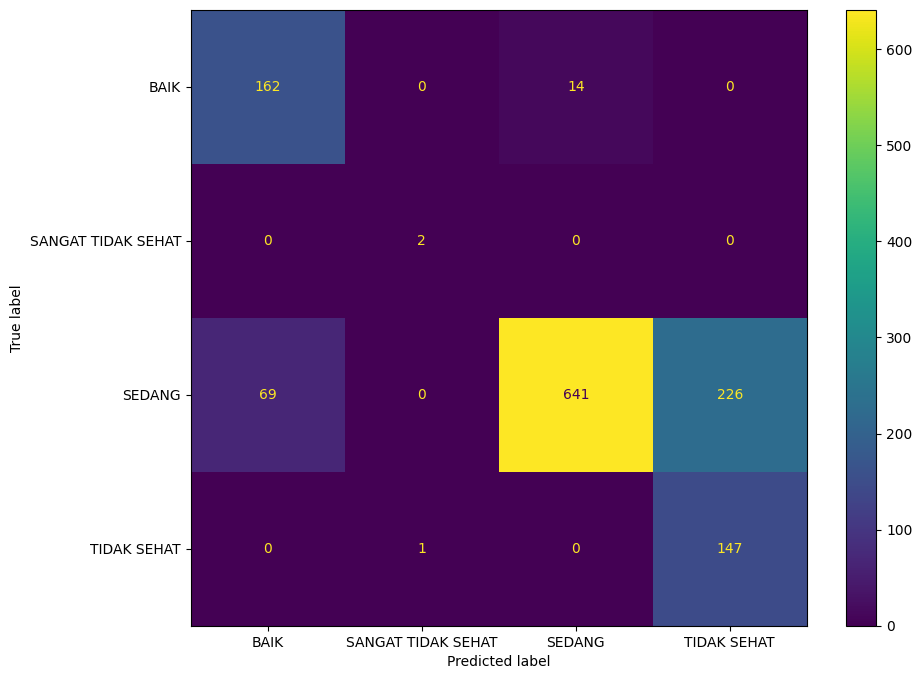

In [ ]:
# Ukuran visualisasi yang diinginkan (lebar, tinggi) dalam inci
figsize = (10, 8)

# Membuat figure dan axes dengan ukuran yang ditentukan
fig, ax = plt.subplots(figsize=figsize)

# Membuat ConfusionMatrixDisplay dengan ukuran yang ditentukan dan axes yang telah dibuat
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_nb, display_labels=nb.classes_, ax=ax)

#### Data Test

In [ ]:
y_pred_test_nb = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test_nb)
precision = precision_score(y_test, y_pred_test_nb, average='weighted')
recall = recall_score(y_test, y_pred_test_nb, average='weighted')
f1 = f1_score(y_test, y_pred_test_nb, average='weighted')

print(f'Accuracy : {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall   : {recall:.5f}')
print(f'F1 Score : {f1:.5f}')

Accuracy : 0.78044
Precision: 0.88255
Recall   : 0.78044
F1 Score : 0.80192


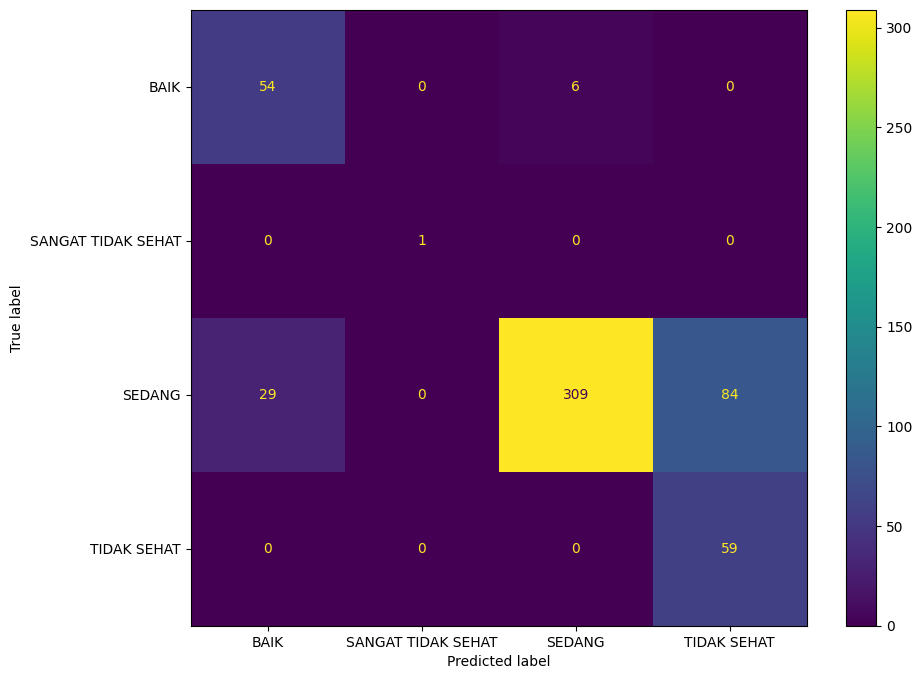

In [ ]:
# Ukuran visualisasi yang diinginkan (lebar, tinggi) dalam inci
figsize = (10, 8)

# Membuat figure dan axes dengan ukuran yang ditentukan
fig, ax = plt.subplots(figsize=figsize)

# Membuat ConfusionMatrixDisplay dengan ukuran yang ditentukan dan axes yang telah dibuat
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_nb, display_labels=nb.classes_, ax=ax)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

### Evaluasi Model


#### Data Latih

In [ ]:
y_pred_train_dtc = dtc.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_train_dtc)
precision = precision_score(y_train, y_pred_train_dtc, average='weighted')
recall = recall_score(y_train, y_pred_train_dtc, average='weighted')
f1 = f1_score(y_train, y_pred_train_dtc, average='weighted')

print(f'Accuracy : {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall   : {recall:.5f}')
print(f'F1 Score : {f1:.5f}')

Accuracy : 1.00000
Precision: 1.00000
Recall   : 1.00000
F1 Score : 1.00000


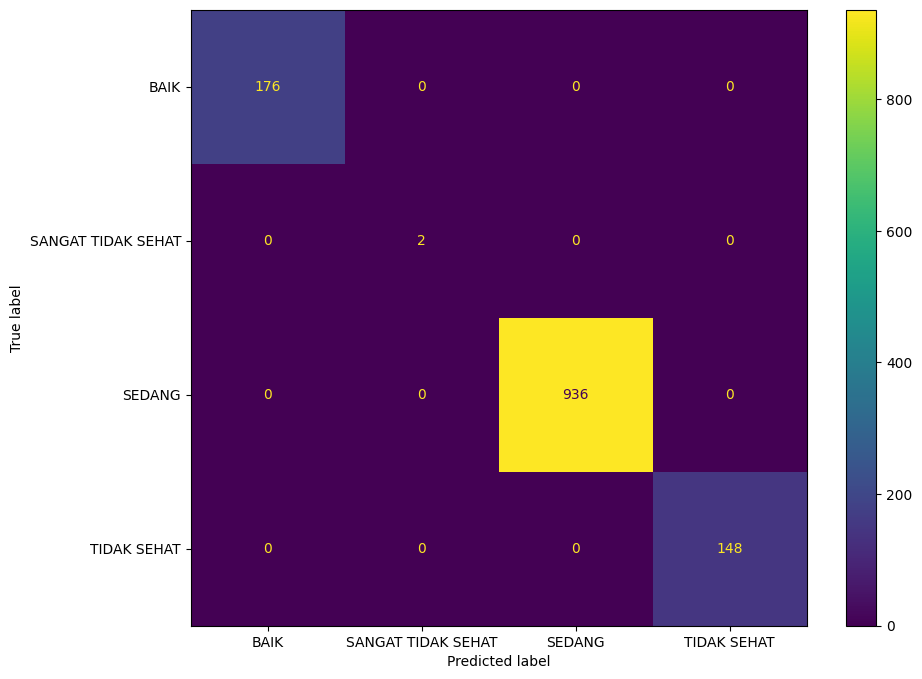

In [ ]:
# Ukuran visualisasi yang diinginkan (lebar, tinggi) dalam inci
figsize = (10, 8)

# Membuat figure dan axes dengan ukuran yang ditentukan
fig, ax = plt.subplots(figsize=figsize)

# Membuat ConfusionMatrixDisplay dengan ukuran yang ditentukan dan axes yang telah dibuat
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_dtc, display_labels=dtc.classes_, ax=ax)

#### Data Test

In [ ]:
y_pred_test_dtc = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test_dtc)
precision = precision_score(y_test, y_pred_test_dtc, average='weighted')
recall = recall_score(y_test, y_pred_test_dtc, average='weighted')
f1 = f1_score(y_test, y_pred_test_dtc, average='weighted')

print(f'Accuracy : {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall   : {recall:.5f}')
print(f'F1 Score : {f1:.5f}')

Accuracy : 1.00000
Precision: 1.00000
Recall   : 1.00000
F1 Score : 1.00000


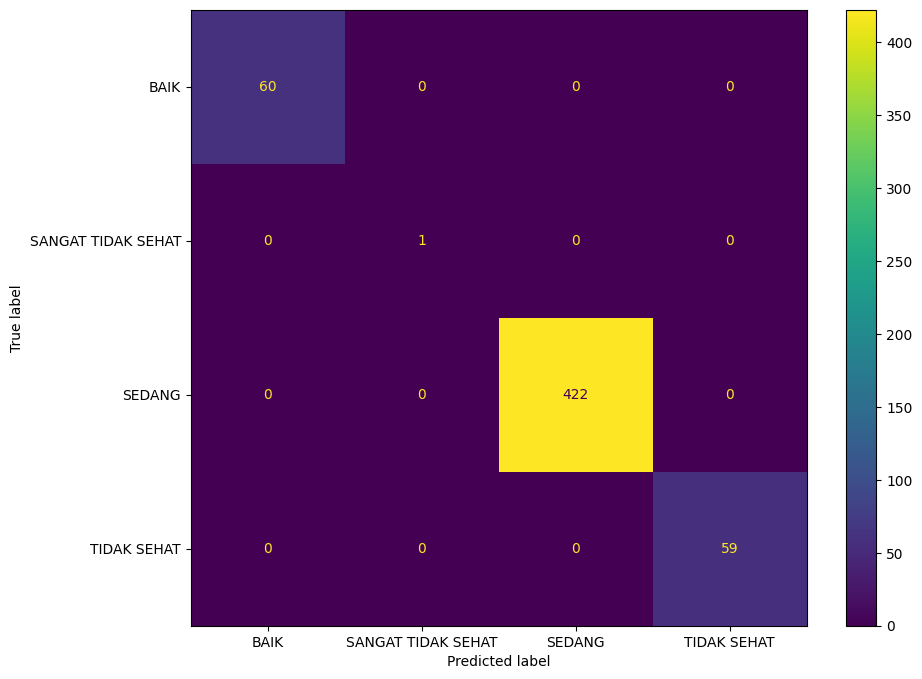

In [ ]:
# Ukuran visualisasi yang diinginkan (lebar, tinggi) dalam inci
figsize = (10, 8)

# Membuat figure dan axes dengan ukuran yang ditentukan
fig, ax = plt.subplots(figsize=figsize)

# Membuat ConfusionMatrixDisplay dengan ukuran yang ditentukan dan axes yang telah dibuat
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_dtc, display_labels=dtc.classes_, ax=ax)

## MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

### Evaluasi Model


#### Data Latih

In [ ]:
y_pred_train_mlp = mlp.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_train_mlp)
precision = precision_score(y_train, y_pred_train_mlp, average='weighted')
recall = recall_score(y_train, y_pred_train_mlp, average='weighted')
f1 = f1_score(y_train, y_pred_train_mlp, average='weighted')

print(f'Accuracy : {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall   : {recall:.5f}')
print(f'F1 Score : {f1:.5f}')

Accuracy : 0.94849
Precision: 0.94767
Recall   : 0.94849
F1 Score : 0.94636


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


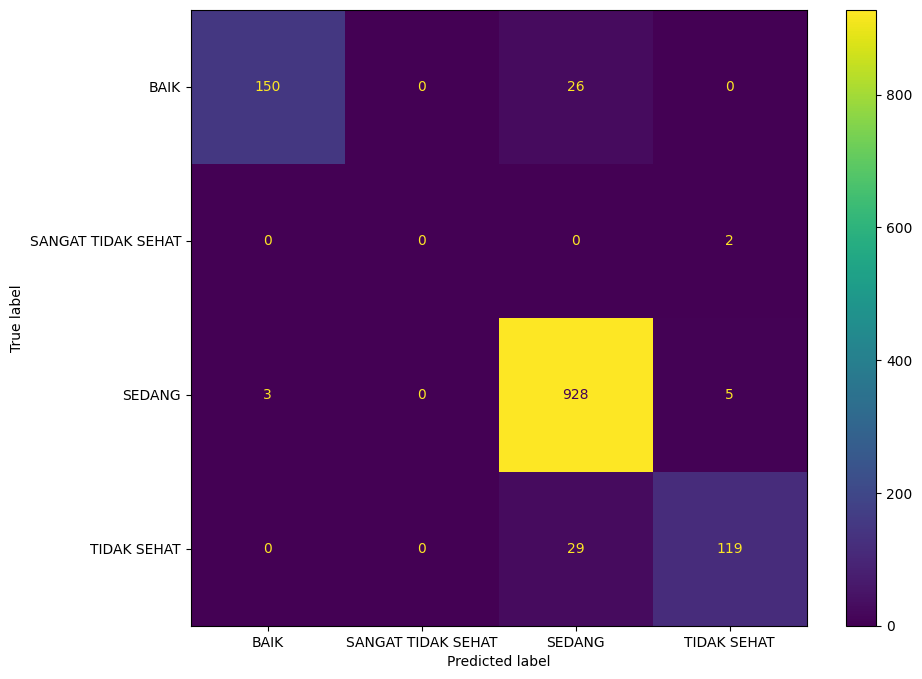

In [ ]:
# Ukuran visualisasi yang diinginkan (lebar, tinggi) dalam inci
figsize = (10, 8)

# Membuat figure dan axes dengan ukuran yang ditentukan
fig, ax = plt.subplots(figsize=figsize)

# Membuat ConfusionMatrixDisplay dengan ukuran yang ditentukan dan axes yang telah dibuat
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_mlp, display_labels=mlp.classes_, ax=ax)

#### Data Test

In [ ]:
y_pred_test_mlp = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test_mlp)
precision = precision_score(y_test, y_pred_test_mlp, average='weighted')
recall = recall_score(y_test, y_pred_test_mlp, average='weighted')
f1 = f1_score(y_test, y_pred_test_mlp, average='weighted')

print(f'Accuracy : {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall   : {recall:.5f}')
print(f'F1 Score : {f1:.5f}')

Accuracy : 0.94834
Precision: 0.94712
Recall   : 0.94834
F1 Score : 0.94607


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


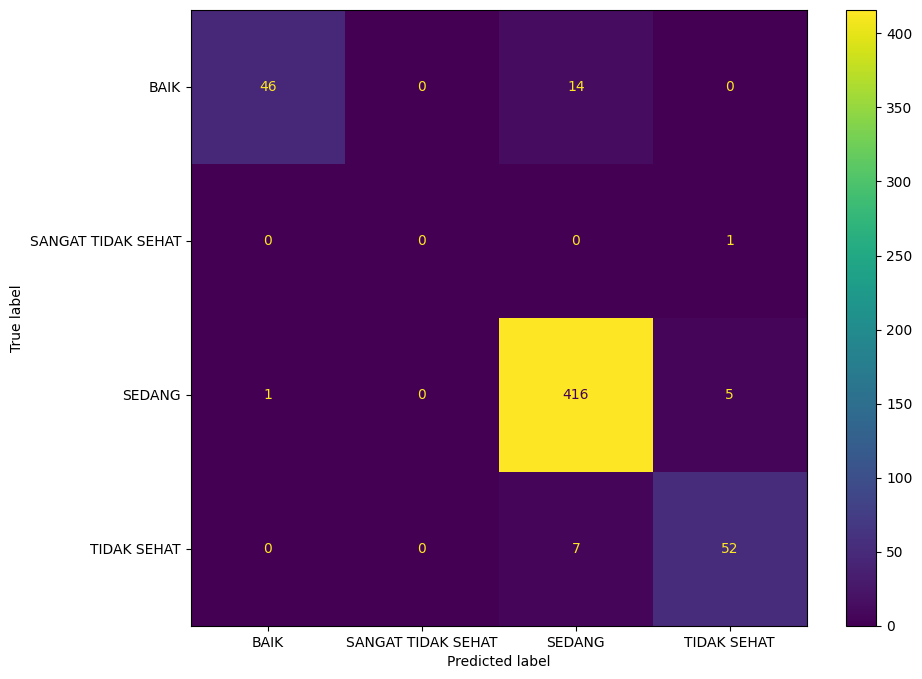

In [ ]:
# Ukuran visualisasi yang diinginkan (lebar, tinggi) dalam inci
figsize = (10, 8)

# Membuat figure dan axes dengan ukuran yang ditentukan
fig, ax = plt.subplots(figsize=figsize)

# Membuat ConfusionMatrixDisplay dengan ukuran yang ditentukan dan axes yang telah dibuat
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_mlp, display_labels=mlp.classes_, ax=ax)

# Mesin Rekomendasi

In [ ]:
def input_data_prediksi():
    data_prediksi = []

    print("Masukkan data untuk prediksi:")

    # stasiun = int(input("Stasiun (1-5): "))
    # if 1 <= stasiun <= 5:
    #     data_prediksi.append(stasiun)
    # else:
    #     print("Stasiun tidak valid. Gunakan angka 1-5.")
    #     return 0

    PM10 = int(input("PM10: "))
    data_prediksi.append(PM10)

    PM25 = int(input("PM25: "))
    data_prediksi.append(PM25)

    SO2 = int(input("SO2: "))
    data_prediksi.append(SO2)

    CO = int(input("CO: "))
    data_prediksi.append(CO)

    O3 = int(input("O3: "))
    data_prediksi.append(O3)

    NO2 = int(input("NO2: "))
    data_prediksi.append(NO2)

    max_value = max(PM10, PM25, SO2, CO, O3, NO2)
    data_prediksi.append(max_value)

    parameter_pencemar_kritis = int(input("Parameter pencemar kritis (0-5): "))
    if 0 <= parameter_pencemar_kritis <= 5:
        data_prediksi.append(parameter_pencemar_kritis)
    else:
        print("Parameter pencemar kritis tidak valid. Gunakan angka 0-5.")
        return 0

    return data_prediksi

def normalisasi(data):
    # Membuat DataFrame dari data
    data_df = pd.DataFrame([data], columns=['PM10', 'PM25', 'SO2', 'CO', 'O3', 'NO2', 'max', 'parameter_pencemar_kritis'])

    # # Membuat DataFrame dari data
    # data_df = pd.DataFrame([data], columns=['stasiun', 'PM10', 'PM25', 'SO2', 'CO', 'O3', 'NO2', 'max', 'parameter_pencemar_kritis'])

    # Pilih kolom yang ingin dinormalisasi
    kolom_normalisasi = ['PM10', 'PM25', 'SO2', 'CO', 'O3', 'NO2']

    # Buat MinMaxScaler
    scaler = MinMaxScaler()

    # Fit scaler ke kolom numerik
    scaler.fit(data_df[kolom_normalisasi])

    # Transform semua kolom numerik
    data_df[kolom_normalisasi] = scaler.transform(data_df[kolom_normalisasi])

    return data_df

In [ ]:
while True:
  data = input_data_prediksi()

  if data == 0:
    input_lagi = input("Ingin mencoba lagi? (y/n): ")
    if input_lagi.lower() != 'y':
      break
    print('-----------------------------')
    continue

  print('-----------------------------')
  print(f"Data prediksi: {data}")
  print('-----------------------------')

  data = normalisasi(data)

  prediksi_svm = svm.predict(data)
  prediksi_knn = knn.predict(data)
  prediksi_nb = nb.predict(data)
  prediksi_dtc = dtc.predict(data)
  prediksi_mlp = mlp.predict(data)

  print(f'Prediksi SVM: {prediksi_svm[0]}')
  print(f'Prediksi KNN: {prediksi_knn[0]}')
  print(f'Prediksi Naive Bayes: {prediksi_nb[0]}')
  print(f'Prediksi Decision Tree: {prediksi_dtc[0]}')
  print(f'Prediksi MLP: {prediksi_mlp[0]}')

  print('-----------------------------')

  if prediksi_dtc[0] == 'BAIK':
    print('TIDAK WAJIB menggunakan masker')
  elif prediksi_dtc[0] == 'SEDANG':
    print('SEBAIKNYA menggunakan masker')
  elif prediksi_dtc[0] == 'TIDAK SEHAT':
    print('HARUS menggunakan masker')
  elif prediksi_dtc[0] == 'SANGAT TIDAK SEHAT':
    print('WAJIB menggunakan masker')

  print('-----------------------------')

  input_lagi = input("Ingin melakukan prediksi lagi? (y/n): ")
  if input_lagi.lower() != 'y':
    break
  print('-----------------------------')

Masukkan data untuk prediksi:
PM10: 45
PM25: 41
SO2: 40
CO: 38
O3: 40
NO2: 32
Parameter pencemar kritis (0-5): 0
-----------------------------
Data prediksi: [45, 41, 40, 38, 40, 32, 45, 0]
-----------------------------
Prediksi SVM: BAIK
Prediksi KNN: BAIK
Prediksi Naive Bayes: BAIK
Prediksi Decision Tree: BAIK
Prediksi MLP: SEDANG
-----------------------------
TIDAK WAJIB menggunkan masker
-----------------------------
Ingin melakukan prediksi lagi? (y/n): Y
-----------------------------
Masukkan data untuk prediksi:
PM10: 52
PM25: 54
SO2: 57
CO: 43
O3: 55
NO2: 41
Parameter pencemar kritis (0-5): 2
-----------------------------
Data prediksi: [52, 54, 57, 43, 55, 41, 57, 2]
-----------------------------
Prediksi SVM: SEDANG
Prediksi KNN: SEDANG
Prediksi Naive Bayes: BAIK
Prediksi Decision Tree: SEDANG
Prediksi MLP: SEDANG
-----------------------------
SEBAIKNYA menggunakan masker
-----------------------------
Ingin melakukan prediksi lagi? (y/n): n
